In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Loading and Preprocessing

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/MTFI Project/Dataset_21.csv')
data.head()

Unnamed: 0  default.2021    VAT.number  \
0           1             0  4.214731e+09   
1           2             0  4.054361e+09   
2           3             0  3.872971e+09   
3           4             0  3.669271e+09   
4           5             0  3.641791e+09   

                                        Company.name               Website  \
0                                     BRIXIA3 S.R.L.                   NaN   
1  TIMING SOCIETA' SPORTIVA DILETTANTISTICA A RES...                   NaN   
2               FONDAZIONE ETS HEDUX IMPRESA SOCIALE                   NaN   
3  MEDIAPROM RACING S.S.D. A R.L. (SOCIETA' SPORT...                   NaN   
4  GUSSAGO BASKET SOCIETA' SPORTIVA DILETTANTISTI...  www.gussagobasket.it   

   Last.accounting.closing.date Legal.status  \
0                          2021       Active   
1                          2022       Active   
2                          2021       Active   
3                          2021       Active   
4                          2022       Active   

                      ATECO.2007.code    Commune     Region  ...  \
0               Finance and Insurance    Brescia  Lombardia  ...   
1  Arts, Entertainment and Recreation    Brescia  Lombardia  ...   
2                           Education     Genova    Liguria  ...   
3  Arts, Entertainment and Recreation  Botticino  Lombardia  ...   
4  Arts, Entertainment and Recreation    Gussago  Lombardia  ...   

   Number of advisors  Number of directors managers  No of available years  \
0                   0                             2                      2   
1                   0                             3                      3   
2                   0                             2                      1   
3                   0                             1                      3   
4                   0                             3                      2   

   Current Assets  Net financial position  Total shareholders funds  \
0               0                     NaN                         9   
1              75                     NaN                        33   
2              84                     NaN                        74   
3              36                     NaN                        31   
4              93                     NaN                        39   

   Net working capital  EBITDA  Cash Flow        status  
0                  -47    -1.0      -1.20  Non-bankrupt  
1                   19    48.0      47.76  Non-bankrupt  
2                   69     7.0       7.32  Non-bankrupt  
3                   14    23.0      22.58  Non-bankrupt  
4                   41   -10.0     -13.57  Non-bankrupt  

[5 rows x 58 columns]

In [ ]:
data.dtypes

Unnamed: 0                            int64
default.2021                          int64
VAT.number                          float64
Company.name                         object
Website                              object
Last.accounting.closing.date          int64
Legal.status                         object
ATECO.2007.code                      object
Commune                              object
Region                               object
Short-term debt/equity              float64
Debt/equity ratio                   float64
Leverage                            float64
Sharefunds/Liabilities              float64
Short-term debt/Total Debt          float64
Short-term debt/Total Assets        float64
Total Debts/Total Assets            float64
Cash/Total Assets                   float64
Intangible Assets/Total Assets      float64
Tangible Assets/Total Assets        float64
Net working capital/Total Assets    float64
Quick Assets/Total Assets           float64
Current ratio                   

In [ ]:
data.isna().sum()

Unnamed: 0                               0
default.2021                             0
VAT.number                             150
Company.name                             0
Website                             478607
Last.accounting.closing.date             0
Legal.status                             0
ATECO.2007.code                          0
Commune                                 35
Region                                  34
Short-term debt/equity                7566
Debt/equity ratio                   416418
Leverage                              1341
Sharefunds/Liabilities              151939
Short-term debt/Total Debt           15608
Short-term debt/Total Assets          1995
Total Debts/Total Assets              1995
Cash/Total Assets                     1995
Intangible Assets/Total Assets        1995
Tangible Assets/Total Assets          1995
Net working capital/Total Assets      1995
Quick Assets/Total Assets             1995
Current ratio                        60449
Liquidity r

In [ ]:
#filtering the ATECO 2007 for construction, turnover less 50, employees less than 250 and balance sheet fewer than 43 mln
data = data.drop(columns =['Unnamed: 0', 'VAT.number', 'Website', 'Commune','Number of directors managers', 'Last.accounting.closing.date'])
filtered_data= data[(data['ATECO.2007.code']  == 'Construction') & (data['Sales'] <= 50000) & (data['Number of employees'] <= 250) & (data['Total Assets'] <= 43000)]
filtered_data

default.2021                                       Company.name  \
6                  1  ENRICO FERMI 23 - SOCIETA' COOPERATIVA EDILIZI...   
20                 0              VALENTINA SOCIETA' COOPERATIVA A R.L.   
79                 0                            CONSORZIO TOR CERVARA 2   
81                 0                  CONSORZIO B54 TRIGORIA TRANDAFILO   
145                0                                 SVILUPPO 41 S.R.L.   
...              ...                                                ...   
668183             0                      IMMOBILIARE PONTARELLI S.R.L.   
668192             1          MARELLI IMPIANTI S.R.L. - IN LIQUIDAZIONE   
668198             0                                    O.R.M.E. S.R.L.   
668210             0                    IDRO EDIL ELETTROTERMICA S.R.L.   
668252             0                             ASFALTI COLOMBO S.R.L.   

                   Legal.status ATECO.2007.code                 Region  \
6       Dissolved (liquidation)    Construction               Calabria   
20                       Active    Construction               Calabria   
79                       Active    Construction                  Lazio   
81                       Active    Construction                  Lazio   
145                      Active    Construction                  Lazio   
...                         ...             ...                    ...   
668183                   Active    Construction                 Molise   
668192           In liquidation    Construction              Lombardia   
668198                   Active    Construction  Friuli-Venezia Giulia   
668210                   Active    Construction                 Marche   
668252                   Active    Construction              Lombardia   

        Short-term debt/equity  Debt/equity ratio   Leverage  \
6                         4.39                 0.0      5.41   
20                       28.00                 NaN     77.21   
79                        0.50                 NaN      1.49   
81                        0.33                 NaN      1.34   
145                       0.06                 0.0      1.06   
...                        ...                 ...       ...   
668183                    0.05                 NaN      1.59   
668192                   -1.02                 NaN     -2.07   
668198                    0.47                 0.2      2.02   
668210                    3.96                 NaN      7.00   
668252                    0.15                 NaN      1.25   

        Sharefunds/Liabilities  Short-term debt/Total Debt  ...   P&L  \
6                          NaN                        1.00  ...   9.0   
20                         NaN                        0.61  ...   0.0   
79                         NaN                        1.00  ...  -4.0   
81                         NaN                        1.00  ...  -3.0   
145                      16.78                        1.00  ...  -1.0   
...                        ...                         ...  ...   ...   
668183                     NaN                        0.09  ...   1.0   
668192                     NaN                        0.34  ...  10.0   
668198                    1.57                        0.73  ...  78.0   
668210                    0.25                        1.00  ...  21.0   
668252                    4.02                        0.59  ...  50.0   

        Number of advisors  No of available years  Current Assets  \
6                        0                      5             114   
20                       0                     10              29   
79                       0                     10               9   
81                       0                     10              12   
145                      0                     10               5   
...                    ...                    ...             ...   
668183                   0                     10             778   
668192              

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90711 entries, 6 to 668252
Data columns (total 52 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   default.2021                      90711 non-null  int64  
 1   Company.name                      90711 non-null  object 
 2   Legal.status                      90711 non-null  object 
 3   ATECO.2007.code                   90711 non-null  object 
 4   Region                            90700 non-null  object 
 5   Short-term debt/equity            89649 non-null  float64
 6   Debt/equity ratio                 33218 non-null  float64
 7   Leverage                          90428 non-null  float64
 8   Sharefunds/Liabilities            62228 non-null  float64
 9   Short-term debt/Total Debt        88514 non-null  float64
 10  Short-term debt/Total Assets      90435 non-null  float64
 11  Total Debts/Total Assets          90435 non-null  float64
 12  Cas

In [ ]:
filtered_data.groupby('status').count()

default.2021  Company.name  Legal.status  ATECO.2007.code  \
status                                                                    
Bankrupt              5861          5861          5861             5861   
Non-bankrupt         84850         84850         84850            84850   

              Region  Short-term debt/equity  Debt/equity ratio   Leverage  \
status                                                                       
Bankrupt        5860                    5745                1934      5831   
Non-bankrupt   84840                   83904               31284     84597   

              Sharefunds/Liabilities  Short-term debt/Total Debt  ...  \
status                                                            ...   
Bankrupt                        1954                        5593  ...   
Non-bankrupt                   60274                       82921  ...   

              Total Assets    P&L  Number of advisors  No of available years  \
status                                                                         
Bankrupt              5861   5846                5861                   5861   
Non-bankrupt         84850  84835               84850                  84850   

              Current Assets  Net financial position  \
status                                                 
Bankrupt                5861                    1936   
Non-bankrupt           84850                   31309   

              Total shareholders funds  Net working capital  EBITDA  Cash Flow  
status                                                                          
Bankrupt                          5861                 5861    5848       5846  
Non-bankrupt                     84850                84850   84842      84838  

[2 rows x 51 columns]

## Dealing with Missing Values

In [ ]:
nan_percentage = filtered_data.isnull().mean() * 100
threshold = 10
columns_to_remove = nan_percentage[nan_percentage > threshold].index.tolist()
data_cleaned = filtered_data.drop(columns=columns_to_remove)
bankrupt_count_after_removal= data_cleaned['default.2021'].value_counts()
print(bankrupt_count_after_removal)
nan_percentage_of_columns_to_remove = nan_percentage[columns_to_remove]
print(nan_percentage_of_columns_to_remove)
#nan_percentage
#print(data_cleaned.isna().sum())
print(data_cleaned.shape)
#print(data_cleaned.columns.tolist())
print(data_cleaned.isna().sum())

0    84850
1     5861
Name: default.2021, dtype: int64
Debt/equity ratio           63.380406
Sharefunds/Liabilities      31.399720
Current ratio               11.126545
ROI                         77.035861
ROS                         32.507634
Turnover per employee       99.626286
Added value per employee    99.662665
R&D/Sales                   49.533133
Interest/EBITDA             48.054811
Interest/turnover           12.292886
Banks/turnover              68.072229
Cost of debit               83.505859
Debt/EBITDA ratio           64.096967
Accounts payable            68.382004
Accounts receivable         65.353706
Net financial position      63.350641
dtype: float64
(90711, 36)
default.2021                           0
Company.name                           0
Legal.status                           0
ATECO.2007.code                        0
Region                                11
Short-term debt/equity              1062
Leverage                             283
Short-term debt/Total D

In [ ]:
nan_percentage

default.2021                         0.000000
Company.name                         0.000000
Legal.status                         0.000000
ATECO.2007.code                      0.000000
Region                               0.012126
Short-term debt/equity               1.170751
Debt/equity ratio                   63.380406
Leverage                             0.311980
Sharefunds/Liabilities              31.399720
Short-term debt/Total Debt           2.421977
Short-term debt/Total Assets         0.304263
Total Debts/Total Assets             0.304263
Cash/Total Assets                    0.304263
Intangible Assets/Total Assets       0.304263
Tangible Assets/Total Assets         0.304263
Net working capital/Total Assets     0.304263
Quick Assets/Total Assets            0.304263
Current ratio                       11.126545
Liquidity ratio                      7.997927
Solvency ratio                       3.343586
ROE                                  9.792638
ROA                               

In [ ]:
data_cleaned_nona = data_cleaned.dropna()
print(data_cleaned_nona['default.2021'].value_counts())
print(data_cleaned_nona.shape)

0    68026
1     2046
Name: default.2021, dtype: int64
(70072, 36)


## Correlation

Checking for Multicollinerity

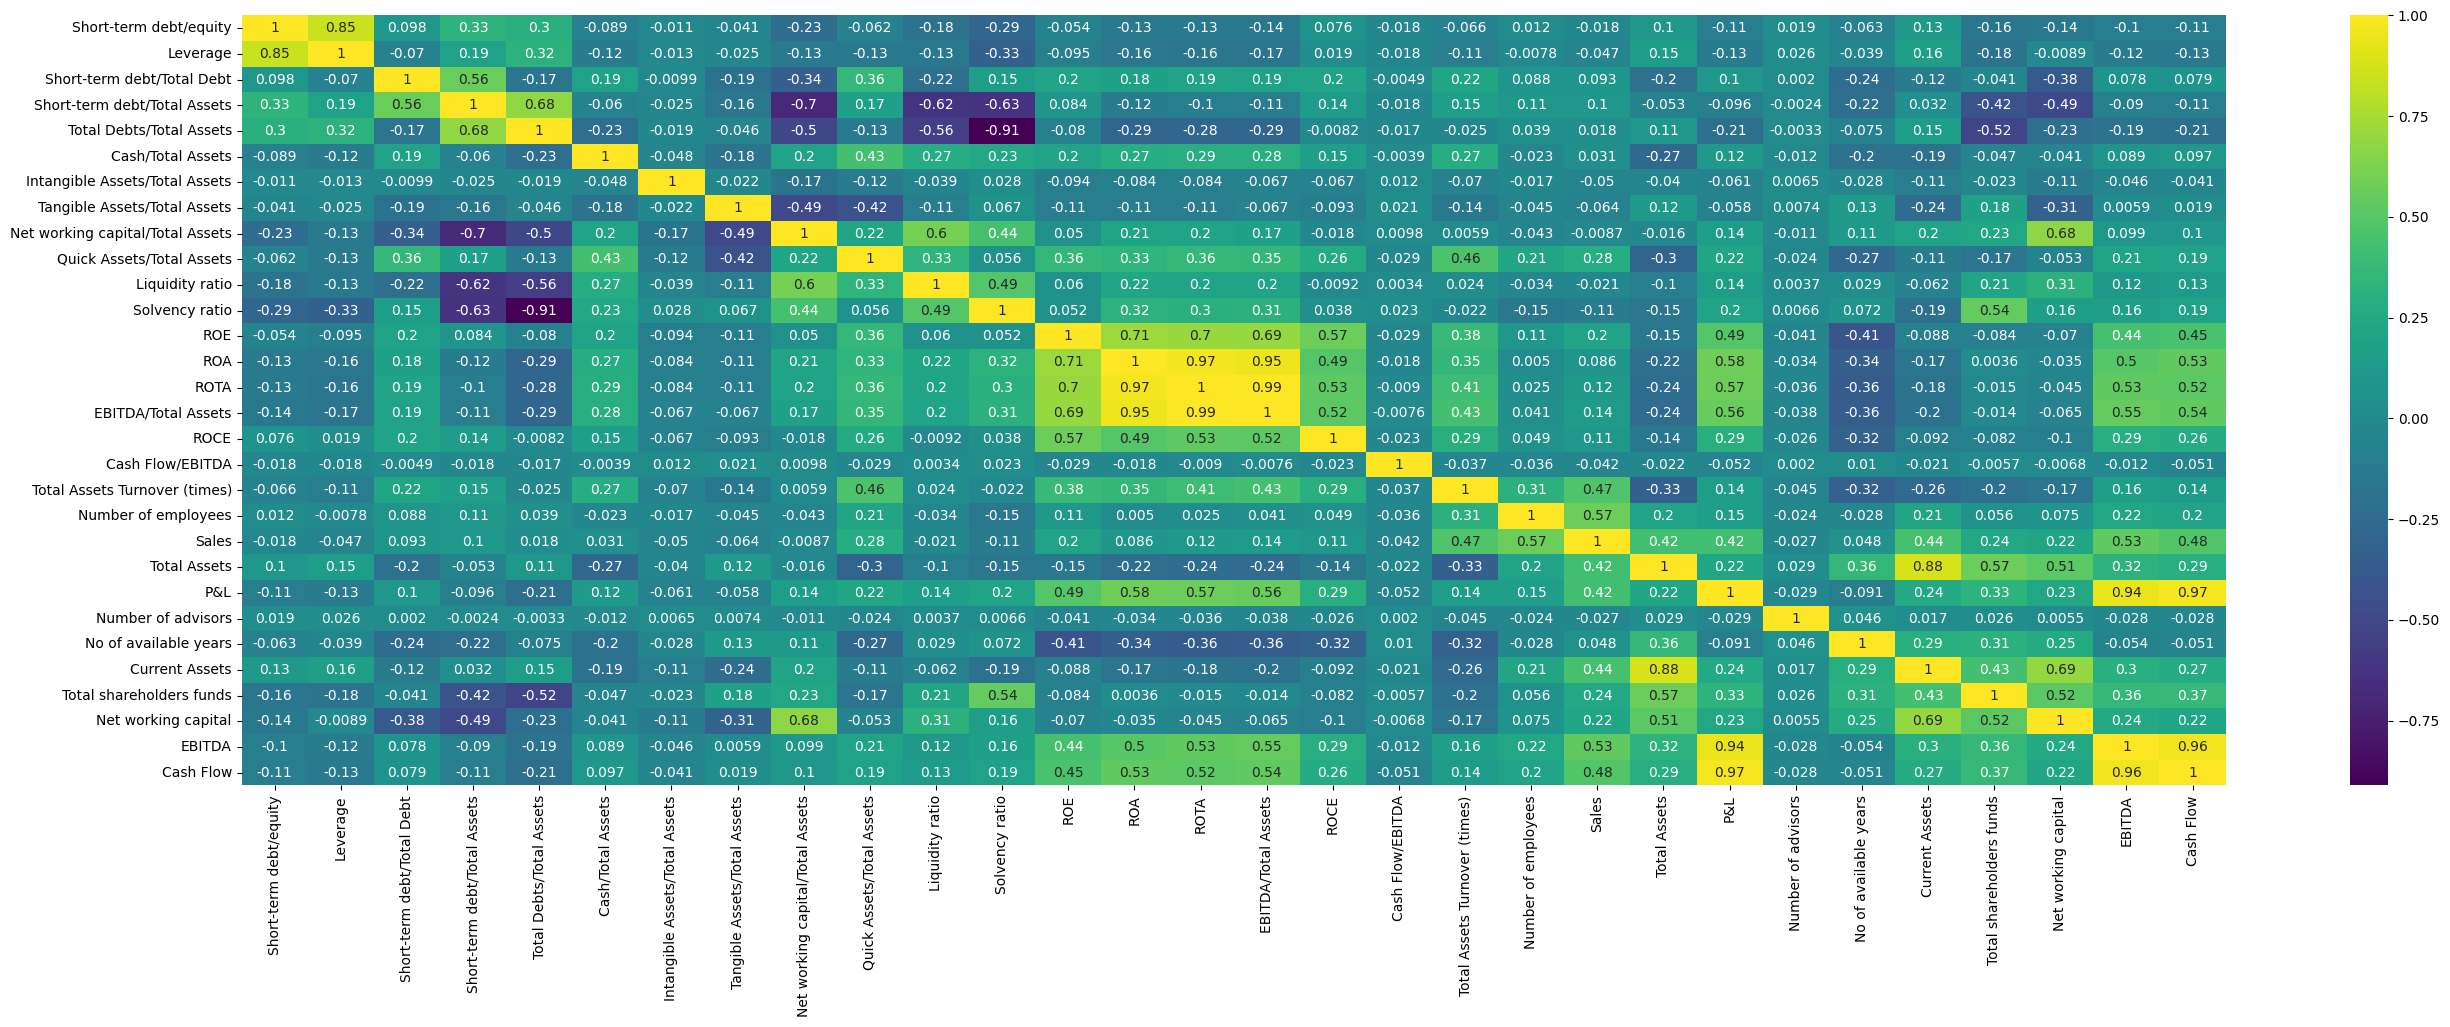

In [ ]:
plt.figure(figsize=(32,10))
sns.heatmap(data_cleaned_nona.drop(columns=['default.2021']).corr(numeric_only=True),annot=True,cmap='viridis')
plt.savefig('DataCorr.pdf',dpi='figure', format='pdf')

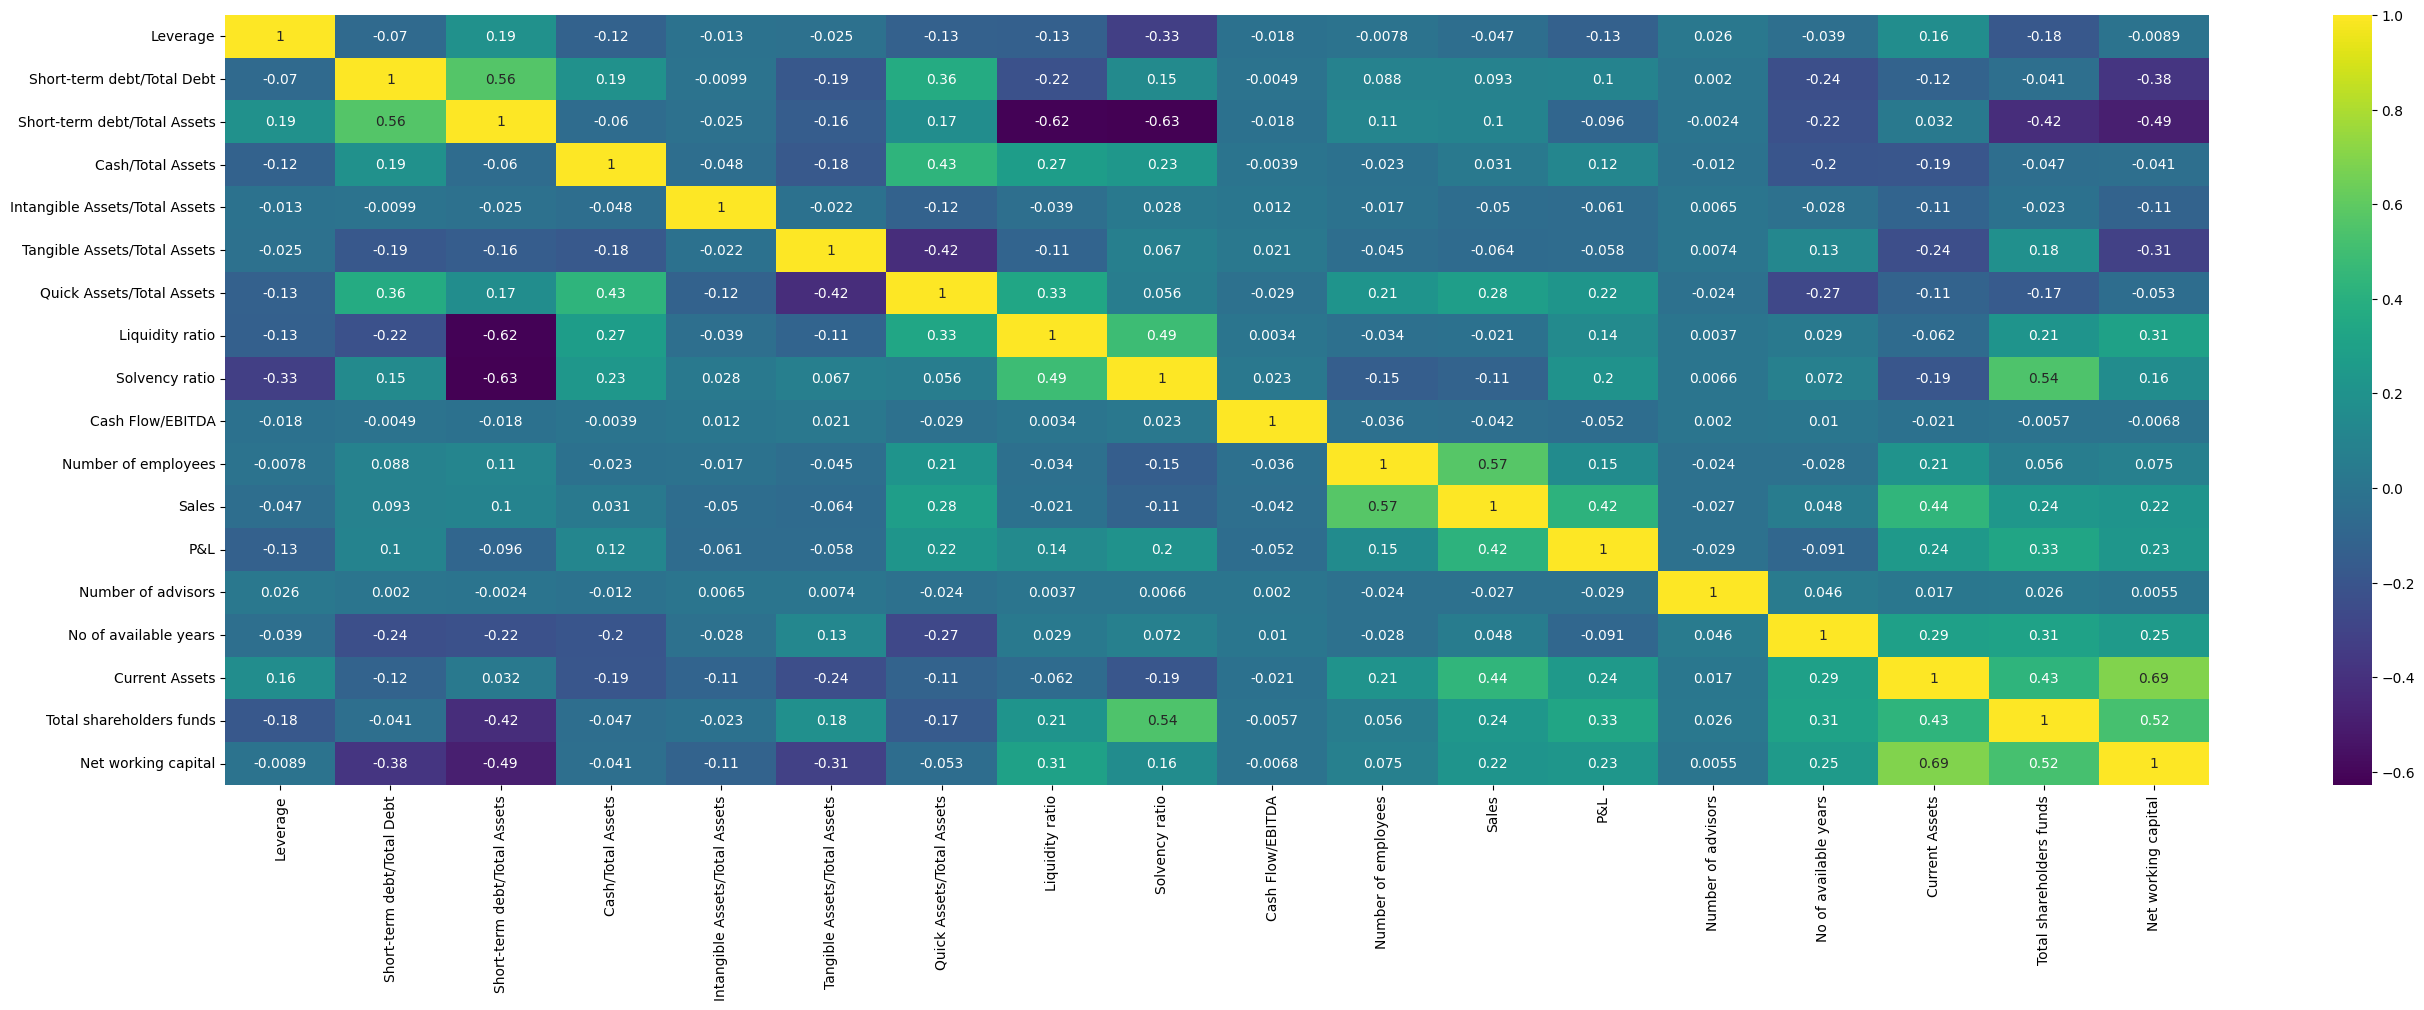

In [ ]:
data_cleaned1 = data_cleaned_nona.drop(columns = ['Short-term debt/equity','ROE','ROCE','ROA','ROTA','Cash Flow',
                                                  'Net working capital/Total Assets','EBITDA','Total Debts/Total Assets',
                                                  'Total Assets', 'EBITDA/Total Assets','Total Assets Turnover (times)'])

plt.figure(figsize=(32,10))
sns.heatmap(data_cleaned1.drop(columns=['default.2021']).corr(numeric_only=True),annot=True,cmap='viridis')
plt.savefig('DataCorrCleaned.pdf',dpi='figure', format='pdf')

In [ ]:
stats_default1 = data_cleaned1[data_cleaned1['default.2021'] == 1].describe()
stats_default1.to_csv('stats_default1.csv', index=True)

In [ ]:
stats_default0 = data_cleaned1[data_cleaned1['default.2021'] == 0].describe()
stats_default0.to_csv('stats_default0.csv', index=True)

In [ ]:
print(data_cleaned1['default.2021'].value_counts())

0    68026
1     2046
Name: default.2021, dtype: int64


##Density plots

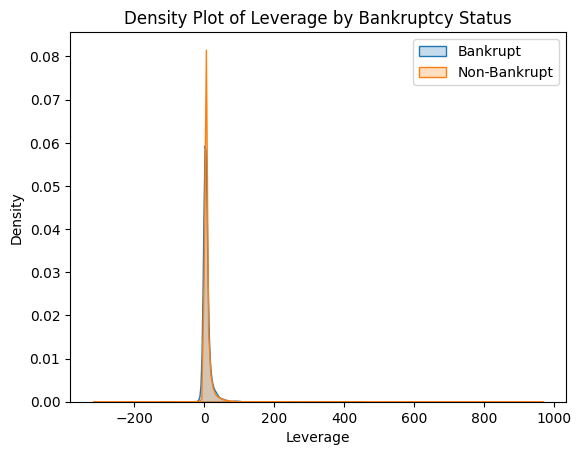

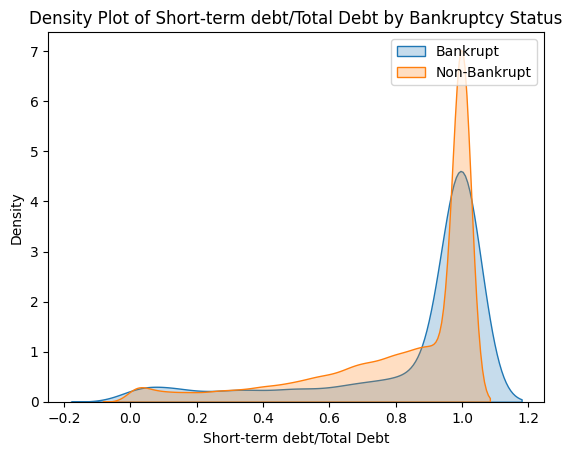

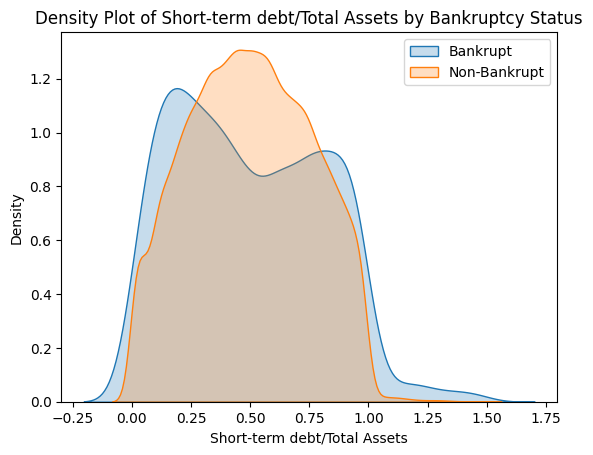

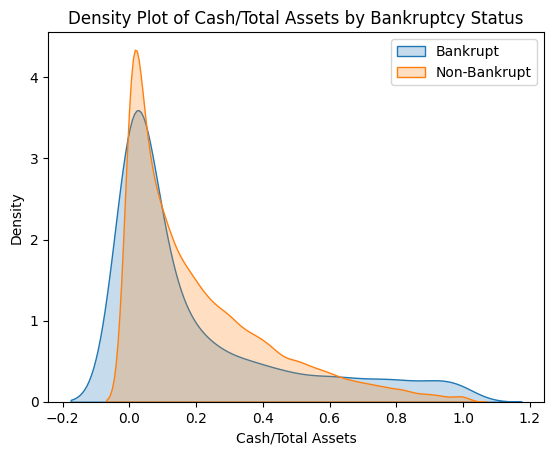

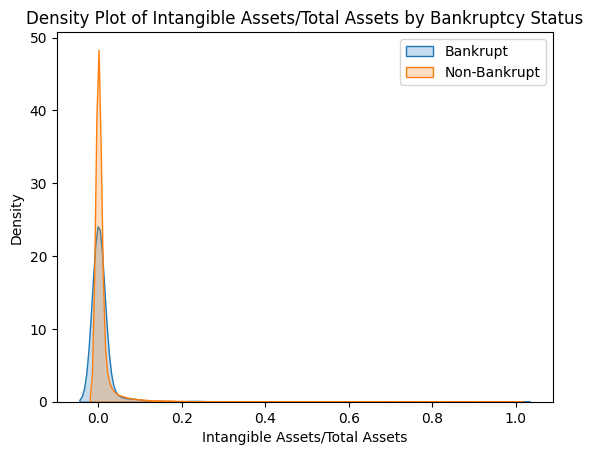

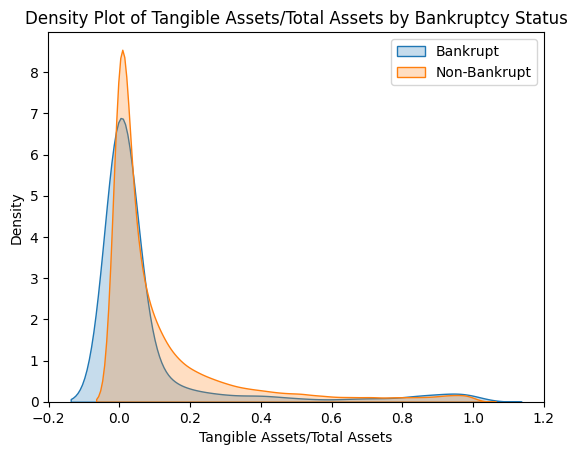

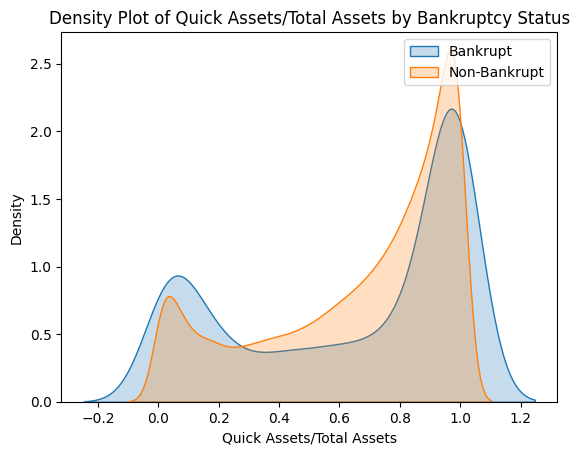

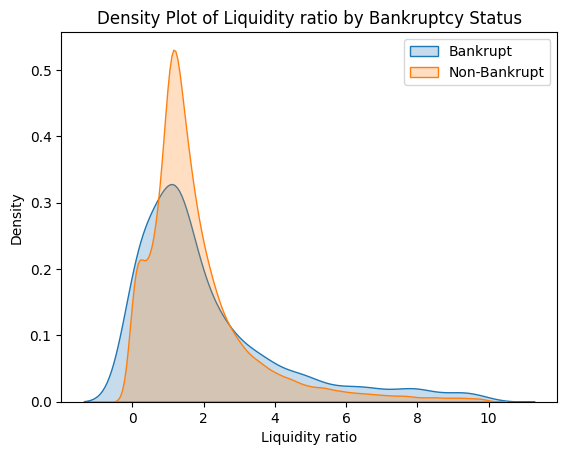

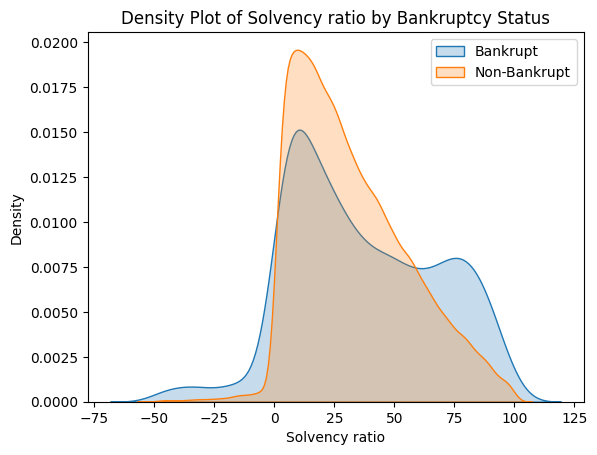

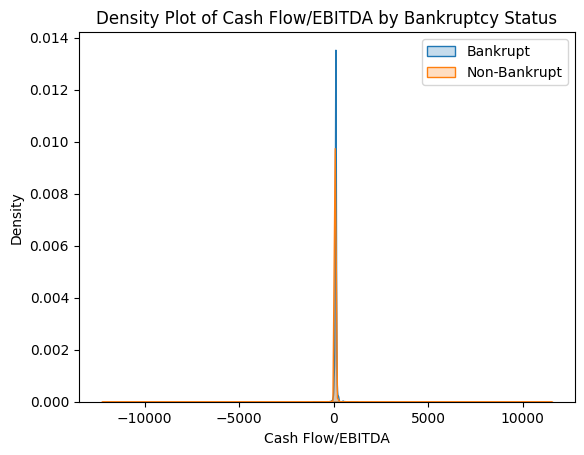

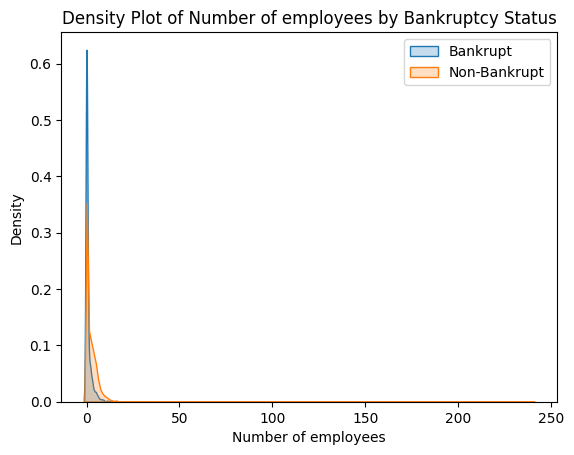

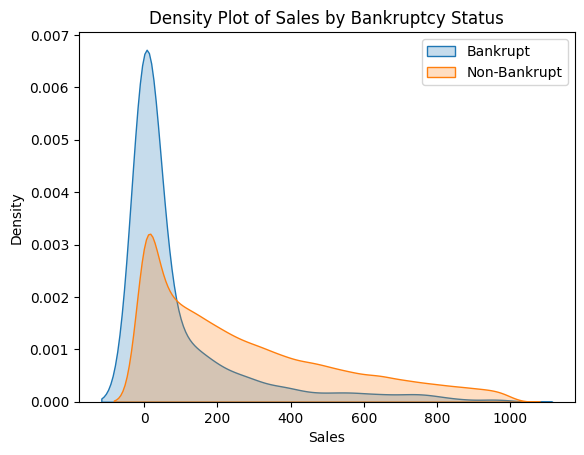

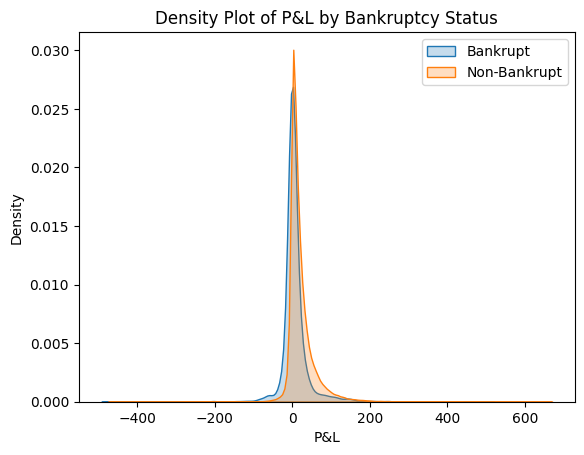

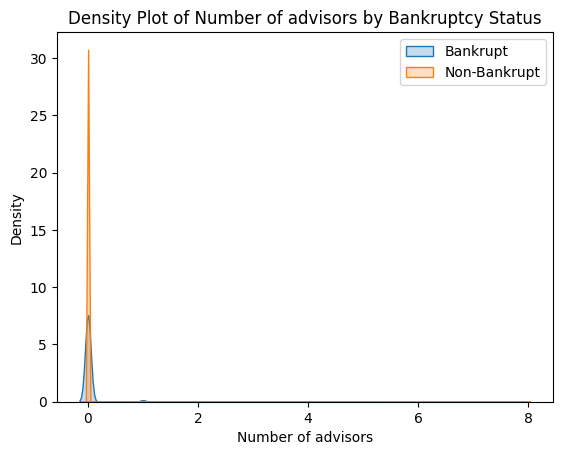

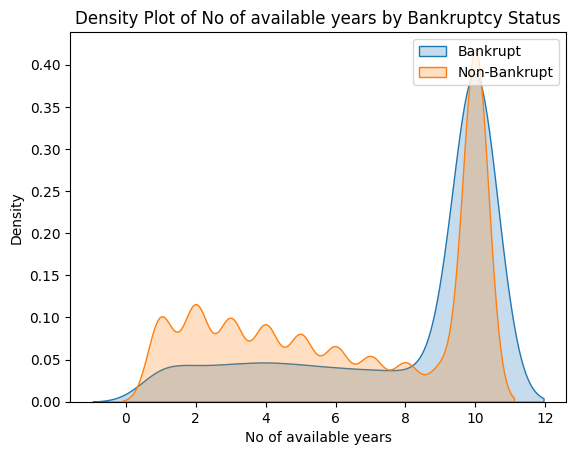

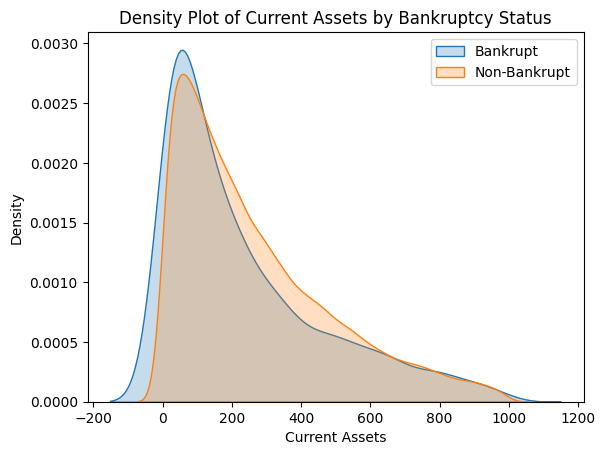

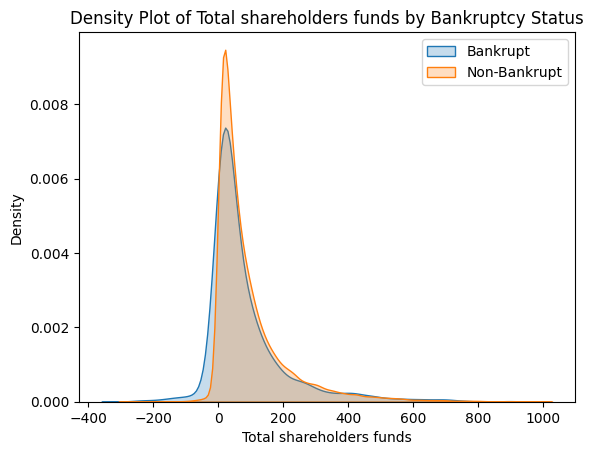

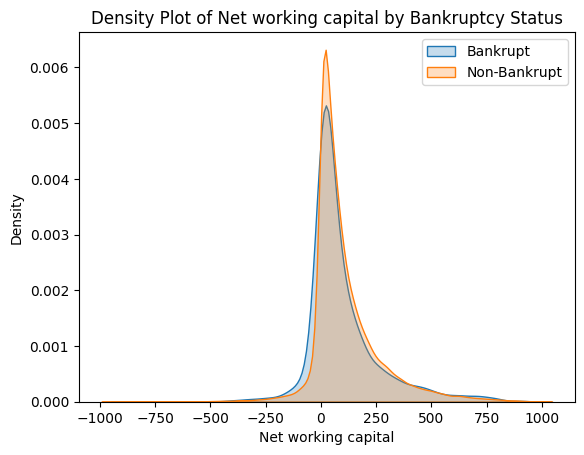

In [ ]:
numerical_columns = data_cleaned1.select_dtypes(include=['int64', 'float64', 'uint64'])

# Droping 2 columns
numerical_columns = numerical_columns.drop(columns=['default.2021'], errors='ignore')

# Get the number of numerical columns after dropping the 2 extra columns
num_numerical_columns = numerical_columns.shape[1]

num_numerical_columns
numerical_columns

folder_path = '/content/gdrive/MyDrive/MTFI Project/Density Graphs'

for column in numerical_columns:
    plt.figure()
    sns.kdeplot(data=data_cleaned1[data_cleaned1['default.2021'] == 1][column], label='Bankrupt', fill=True)
    sns.kdeplot(data=data_cleaned1[data_cleaned1['default.2021'] == 0][column], label='Non-Bankrupt', fill=True)

    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Density Plot of {column} by Bankruptcy Status')
    plt.legend()

    #just in case
    #safe_column_name = column.replace('/', '-').replace(' ', '_')
    #plot_path = f'{folder_path}/{safe_column_name}_density_plot.png'

    # Save
   # plt.savefig(plot_path)
    #plt.close()

    #plt.show()


In [ ]:
numerical_columns

Leverage  Short-term debt/Total Debt  Short-term debt/Total Assets  \
6           5.41                        1.00                          0.81   
79          1.49                        1.00                          0.33   
81          1.34                        1.00                          0.25   
164        51.95                        1.00                          0.98   
183         2.84                        0.27                          0.17   
...          ...                         ...                           ...   
668183      1.59                        0.09                          0.03   
668192     -2.07                        0.34                          0.49   
668198      2.02                        0.73                          0.23   
668210      7.00                        1.00                          0.56   
668252      1.25                        0.59                          0.12   

        Cash/Total Assets  Intangible Assets/Total Assets  \
6                    0.91                            0.00   
79                   0.44                            0.00   
81                   0.00                            0.00   
164                  0.01                            0.00   
183                  0.00                            0.00   
...                   ...                             ...   
668183               0.03                            0.01   
668192               0.00                            0.53   
668198               0.20                            0.00   
668210               0.03                            0.09   
668252               0.30                            0.00   

        Tangible Assets/Total Assets  Quick Assets/Total Assets  \
6                               0.00                       0.92   
79                              0.00                       1.00   
81                              0.00                       1.00   
164                             0.00                       0.98   
183                             0.66                       0.34   
...                              ...                        ...   
668183                          0.00                       0.32   
668192                          0.00                       0.47   
668198                          0.51                       0.39   
668210                          0.43                       0.30   
668252                          0.02                       0.51   

        Liquidity ratio  Solvency ratio  Cash Flow/EBITDA  \
6                  1.13           18.50             75.42   
79                 3.01           66.94             94.25   
81                 3.91           74.40             99.00   
164                1.00            1.93              2.00   
183                1.94           35.16             37.81   
...                 ...             ...               ...   
668183             9.82           62.74             74.29   
668192             0.95          -48.38             74.21   
668198             1.70           49.50             76.06   
668210             0.53           14.28             90.89   
668252             4.40           79.80             66.20   

        Number of employees  Sales   P&L  Number of advisors  \
6                         0    0.0   9.0                   0   
79                        0    0.0  -4.0                   0   
81                        0    0.0  -3.0                   0   
164                       0  433.0   0.0                   0   
183                       0    0.0   0.0                   0   
...                     ...    ...   ...                 ...   
668183                    0   50.0   1.0                   0   
668192                    0   15.0  10.0                   0   
668198                    6  684.0  78.0                   0   
668210                    8  513.0  21.0                   0   
668252                    1  384.0  50.0                   0   

        No of available years  

# Transformation Value

In [ ]:
#Transformation Log and Sign
def transformvalue_sign(x):
    result = np.log(np.abs(x) + 1) * np.sign(x)
    return result

columns_to_log = ['Sales', 'Number of employees']
do_not_transform = ['Solvency ratio']
columns_to_sign = [col for col in numerical_columns if col not in columns_to_log and col not in do_not_transform]

data_cleaned1_transform=data_cleaned1.copy()
data_cleaned1_transform[columns_to_log] = np.log(data_cleaned1_transform[columns_to_log]+1)
data_cleaned1_transform[columns_to_sign] = transformvalue_sign(data_cleaned1_transform[columns_to_sign])

data_cleaned1_transform

default.2021                                       Company.name  \
6                  1  ENRICO FERMI 23 - SOCIETA' COOPERATIVA EDILIZI...   
79                 0                            CONSORZIO TOR CERVARA 2   
81                 0                  CONSORZIO B54 TRIGORIA TRANDAFILO   
164                0                      CONSORZIO COLLE DELLE GENSOLE   
183                0                           CONSORZIO ARTIGIANI 2000   
...              ...                                                ...   
668183             0                      IMMOBILIARE PONTARELLI S.R.L.   
668192             1          MARELLI IMPIANTI S.R.L. - IN LIQUIDAZIONE   
668198             0                                    O.R.M.E. S.R.L.   
668210             0                    IDRO EDIL ELETTROTERMICA S.R.L.   
668252             0                             ASFALTI COLOMBO S.R.L.   

                   Legal.status ATECO.2007.code                 Region  \
6       Dissolved (liquidation)    Construction               Calabria   
79                       Active    Construction                  Lazio   
81                       Active    Construction                  Lazio   
164                      Active    Construction                  Lazio   
183                      Active    Construction                  Lazio   
...                         ...             ...                    ...   
668183                   Active    Construction                 Molise   
668192           In liquidation    Construction              Lombardia   
668198                   Active    Construction  Friuli-Venezia Giulia   
668210                   Active    Construction                 Marche   
668252                   Active    Construction              Lombardia   

        Leverage  Short-term debt/Total Debt  Short-term debt/Total Assets  \
6       1.857859                    0.693147                      0.593327   
79      0.912283                    0.693147                      0.285179   
81      0.850151                    0.693147                      0.223144   
164     3.969348                    0.693147                      0.683097   
183     1.345472                    0.239017                      0.157004   
...          ...                         ...                           ...   
668183  0.951658                    0.086178                      0.029559   
668192 -1.121678                    0.292670                      0.398776   
668198  1.105257                    0.548121                      0.207014   
668210  2.079442                    0.693147                      0.444686   
668252  0.810930                    0.463734                      0.113329   

        Cash/Total Assets  Intangible Assets/Total Assets  ...  \
6                0.647103                        0.000000  ...   
79               0.364643                        0.000000  ...   
81               0.000000                        0.000000  ...   
164              0.009950                        0.000000  ...   
183              0.000000                        0.000000  ...   
...                   ...                             ...  ...   
668183           0.029559                        0.009950  ...   
668192           0.000000                        0.425268  ...   
668198           0.182322                        0.000000  ...   
668210           0.029559                        0.086178  ...   
668252           0.262364                        0.000000  ...   

        Cash Flow/EBITDA  Number of employees     Sales       P&L  \
6               4.336244             0.000000  0.000000  2.302585   
79              4.556505             0.000000  0.000000 -1.609438   
81              4.605170             0.000000  0.000000 -1.386294   
164             1.098612             0.000000  6.073045  0.000000   
183             3.658678             0.000000  0.000000  0.000000   
...                  ...                  ...       ...       ...   
66818

In [ ]:
data_cleaned1_transform.groupby('default.2021').mean()

<ipython-input-16-baa2526b085d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_cleaned1_transform.groupby('default.2021').mean()


Leverage  Short-term debt/Total Debt  \
default.2021                                         
0             1.683444                    0.584196   
1             1.510979                    0.600899   

              Short-term debt/Total Assets  Cash/Total Assets  \
default.2021                                                    
0                                 0.390020           0.173733   
1                                 0.381939           0.160049   

              Intangible Assets/Total Assets  Tangible Assets/Total Assets  \
default.2021                                                                 
0                                   0.012815                      0.101407   
1                                   0.011978                      0.064417   

              Quick Assets/Total Assets  Liquidity ratio  Solvency ratio  \
default.2021                                                               
0                              0.489234         0.923323       31.978177   
1                              0.466644         0.939195       36.706393   

              Cash Flow/EBITDA  Number of employees     Sales       P&L  \
default.2021                                                              
0                     4.143228             0.945057  4.617489  1.979135   
1                     4.154543             0.320590  2.286150  0.277395   

              Number of advisors  No of available years  Current Assets  \
default.2021                                                              
0                       0.003344               1.861173        5.128002   
1                       0.019030               2.109629        4.795093   

              Total shareholders funds  Net working capital  
default.2021                                                 
0                             3.888338             3.404909  
1                             3.441740             3.062180

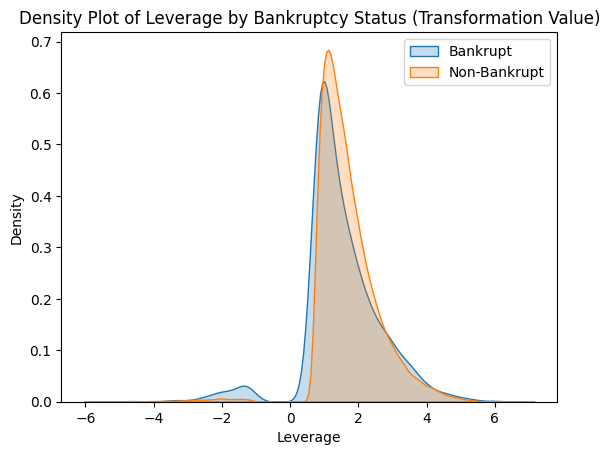

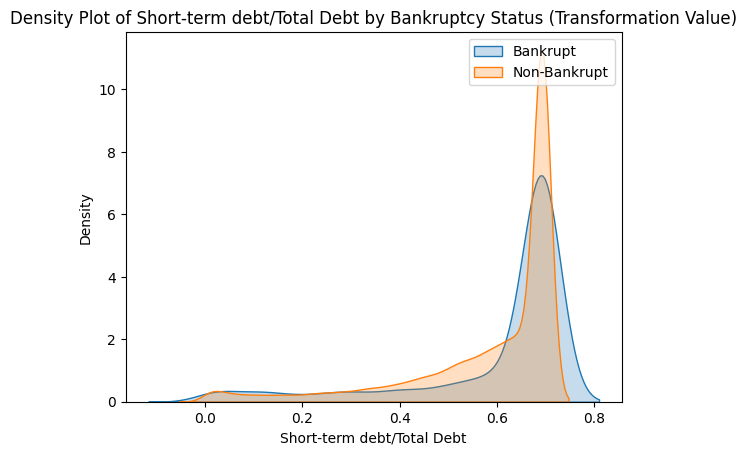

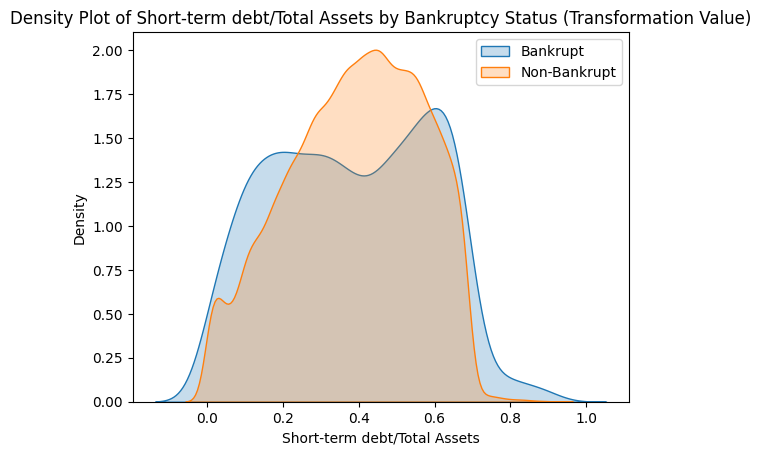

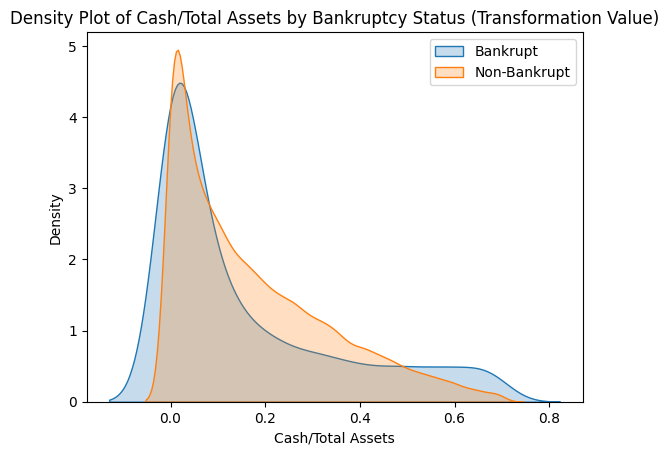

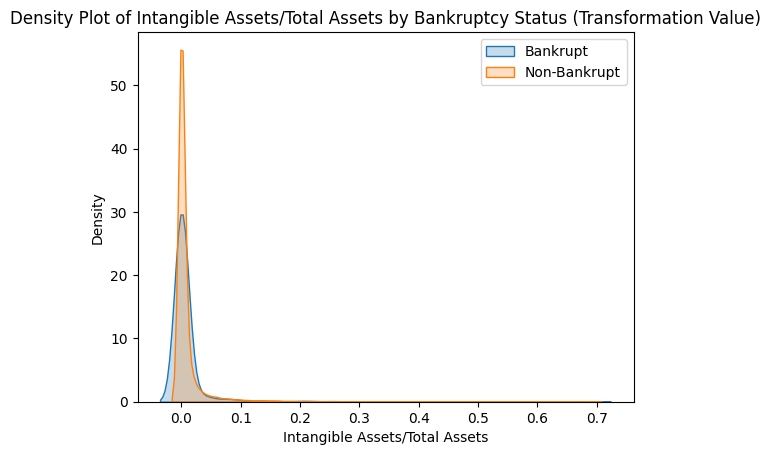

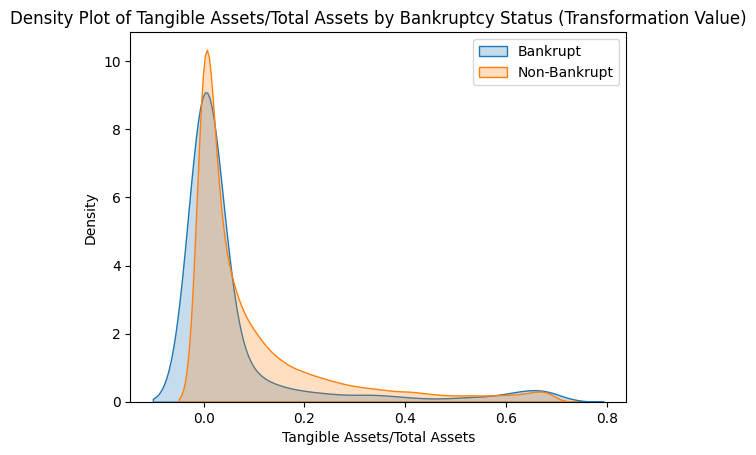

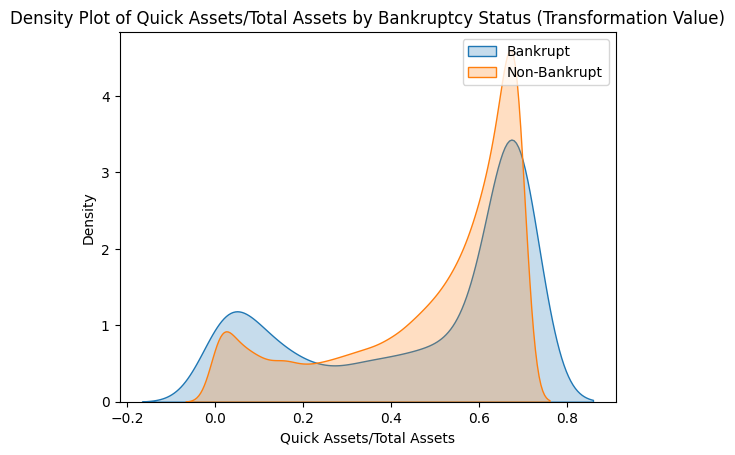

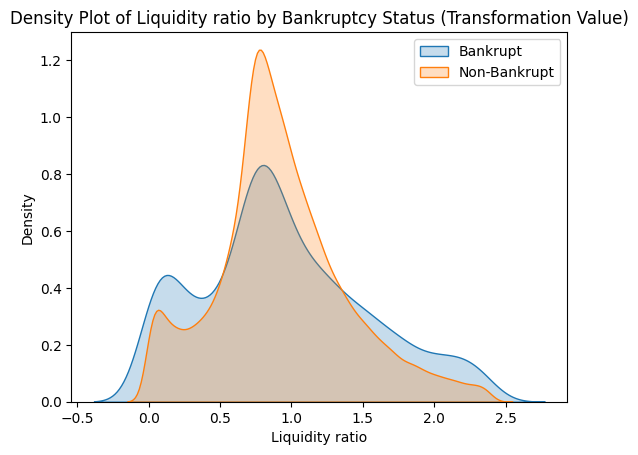

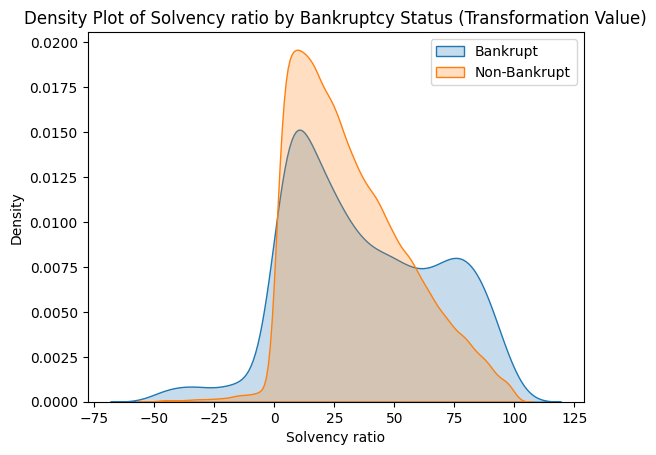

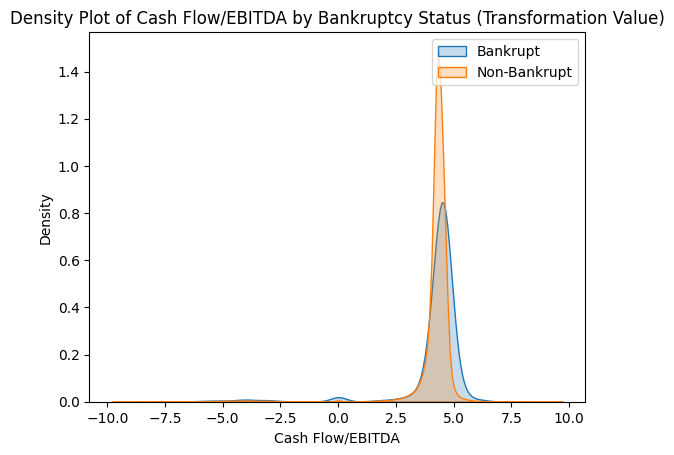

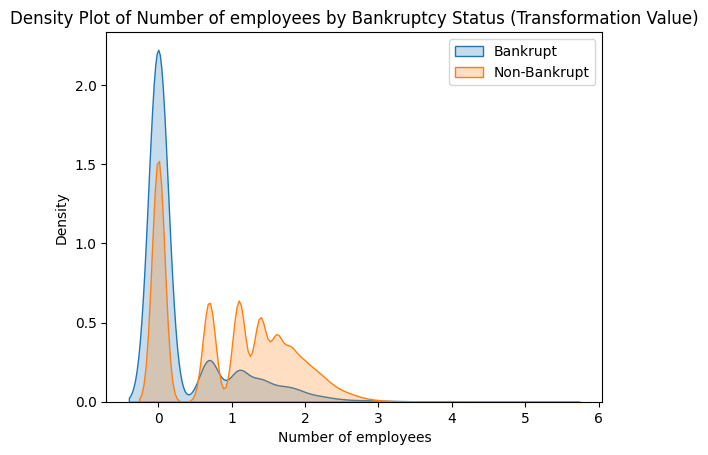

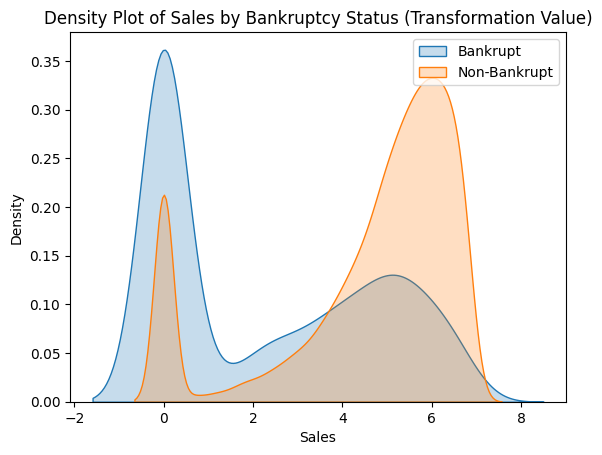

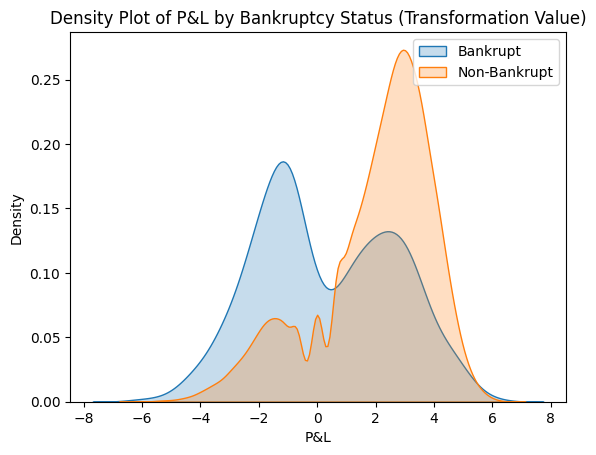

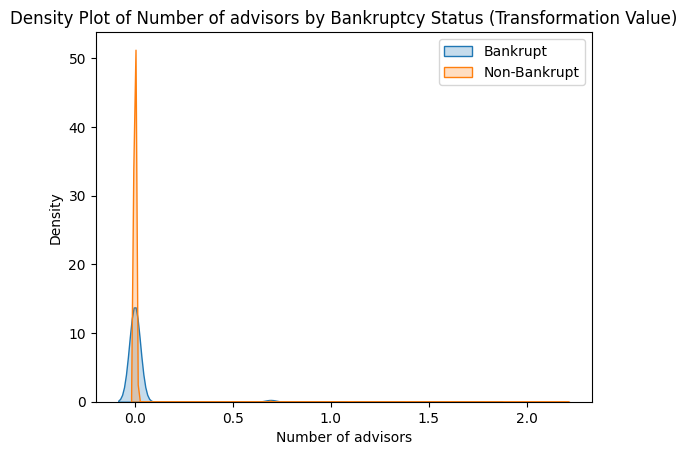

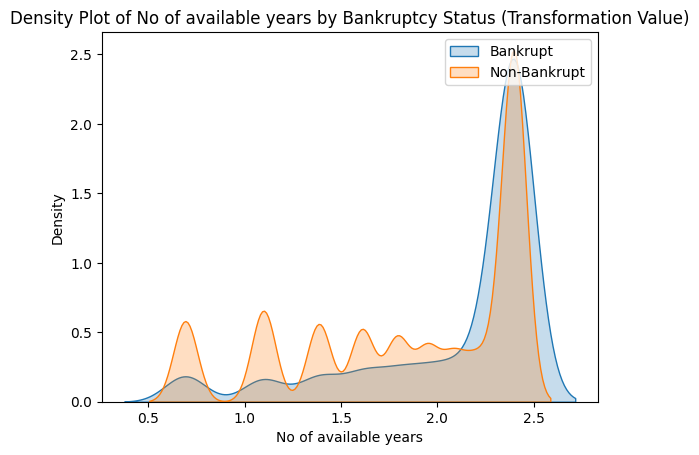

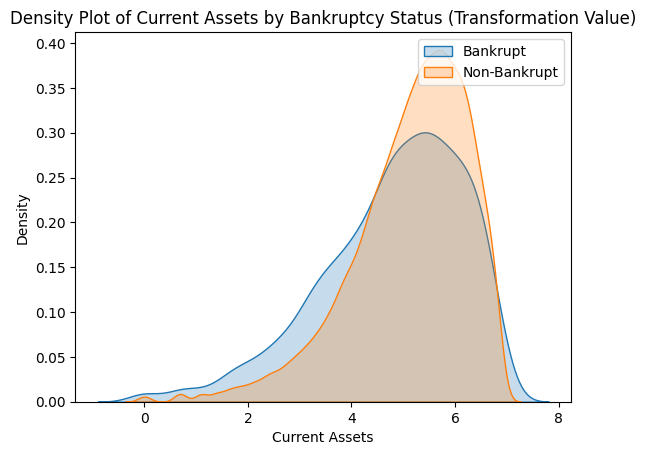

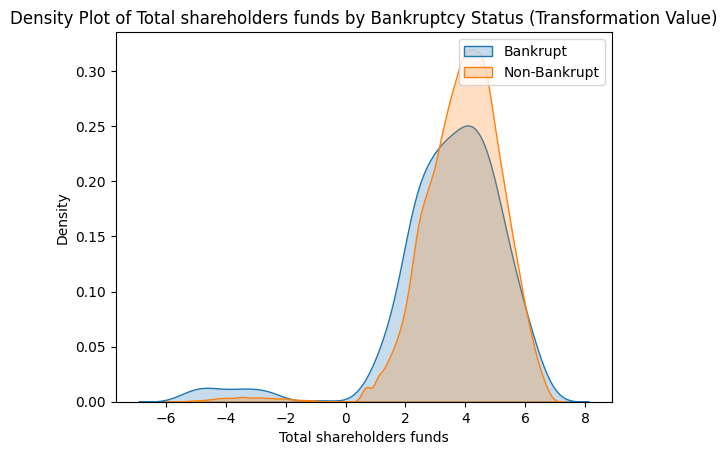

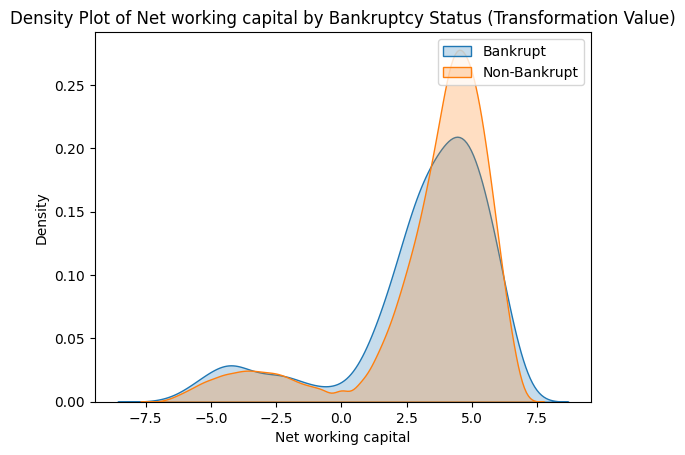

In [ ]:
folder_path = '/content/gdrive/MyDrive/MTFI Project/Density Graphs Transformation'

for column in numerical_columns:
    plt.figure()
    sns.kdeplot(data=data_cleaned1_transform[data_cleaned1_transform['default.2021'] == 1][column], label='Bankrupt', fill=True)
    sns.kdeplot(data=data_cleaned1_transform[data_cleaned1_transform['default.2021'] == 0][column], label='Non-Bankrupt', fill=True)

    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Density Plot of {column} by Bankruptcy Status (Transformation Value)')
    plt.legend()

    #just in case
    #safe_column_name = column.replace('/', '-').replace(' ', '_')
    #plot_path = f'{folder_path}/{safe_column_name}_density_plot_transformation.png'

    # Save
   # plt.savefig(plot_path)
    #plt.close()

    #plt.show()

# Data Visualisation

Some plots for data desription

<Axes: xlabel='Total Assets', ylabel='EBITDA'>

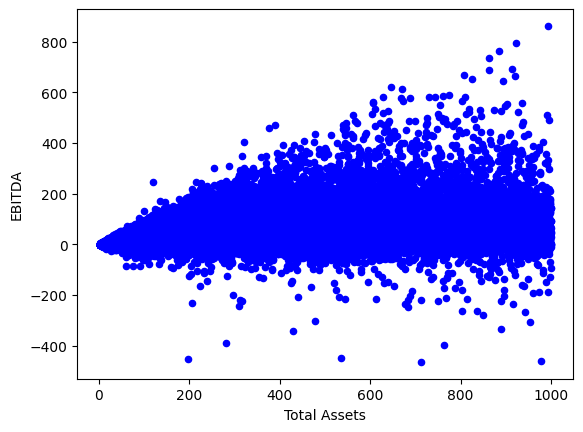

In [ ]:
#scatter plots
data_cleaned_nona.plot(kind='scatter', x='Total Assets', y='EBITDA', color='blue')

<ipython-input-21-dd9402a4f648>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='default.2021', y = 'Sales', data = data_cleaned1, palette=colors)


Text(0.5, 1.0, 'Sales by Bankruptcy Status')

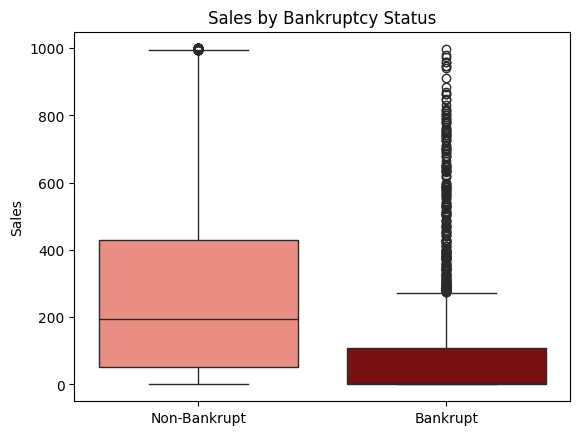

In [ ]:
#Boxplots
colors = ['salmon', 'darkred']
plt.figure()
sns.boxplot(x ='default.2021', y = 'Sales', data = data_cleaned1, palette=colors)
plt.xticks(ticks=[0, 1], labels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('')
plt.ylabel('Sales')
plt.title(f'Sales by Bankruptcy Status')

<ipython-input-22-07b869ef7b30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ='default.2021', y = 'No of available years', data = data_cleaned1, palette=colors)


Text(0.5, 1.0, 'No of available years by Bankruptcy Status')

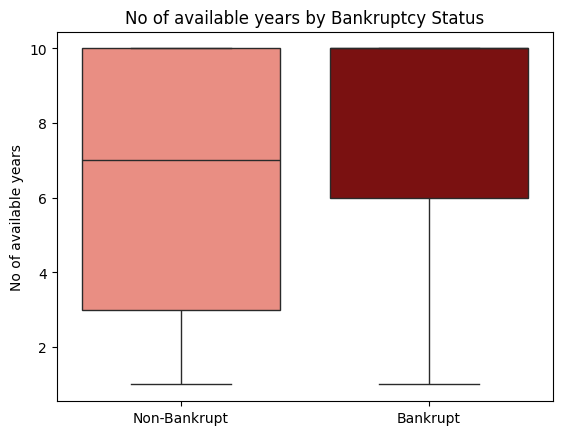

In [ ]:
colors = ['salmon', 'darkred']
plt.figure()
sns.boxplot(x ='default.2021', y = 'No of available years', data = data_cleaned1, palette=colors)
plt.xticks(ticks=[0, 1], labels=['Non-Bankrupt', 'Bankrupt'])
plt.xlabel('')
plt.ylabel('No of available years')
plt.title(f'No of available years by Bankruptcy Status')

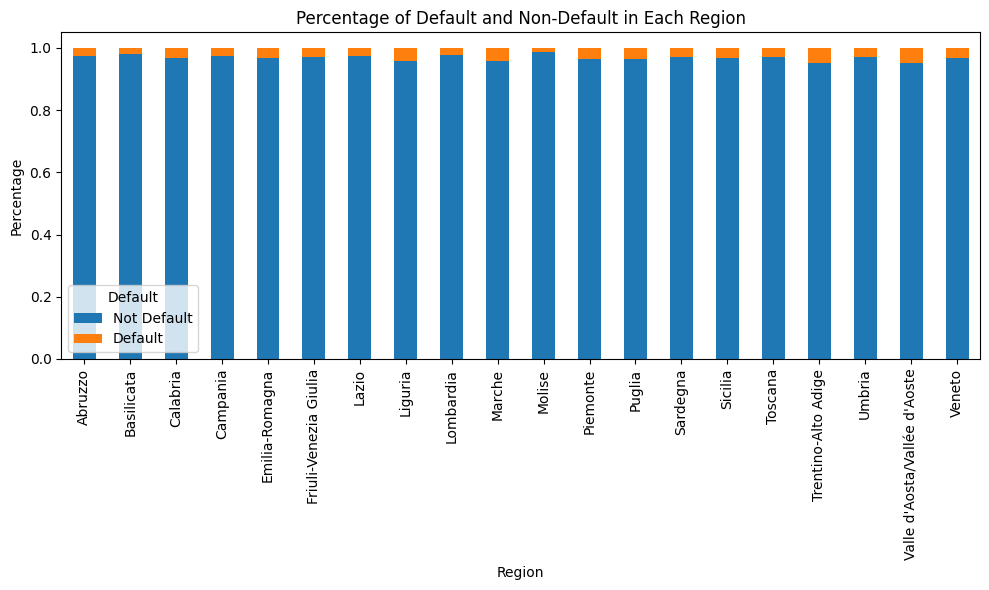

In [ ]:
#default by regions
region_counts = data_cleaned1_transform.groupby('Region')['default.2021'].value_counts(normalize=True).unstack()

region_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

#labels and title
plt.title('Percentage of Default and Non-Default in Each Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
#plt.xticks(rotation=45)

# Show plot
plt.legend(title='Default', labels=['Not Default', 'Default'])
plt.tight_layout()
plt.show()

# Train Test split

In [ ]:
data_cleaned2 = data_cleaned1_transform.drop(['Company.name', 'ATECO.2007.code','Region', 'status', 'Legal.status'], axis=1)
data_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70072 entries, 6 to 668252
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   default.2021                    70072 non-null  int64  
 1   Leverage                        70072 non-null  float64
 2   Short-term debt/Total Debt      70072 non-null  float64
 3   Short-term debt/Total Assets    70072 non-null  float64
 4   Cash/Total Assets               70072 non-null  float64
 5   Intangible Assets/Total Assets  70072 non-null  float64
 6   Tangible Assets/Total Assets    70072 non-null  float64
 7   Quick Assets/Total Assets       70072 non-null  float64
 8   Liquidity ratio                 70072 non-null  float64
 9   Solvency ratio                  70072 non-null  float64
 10  Cash Flow/EBITDA                70072 non-null  float64
 11  Number of employees             70072 non-null  float64
 12  Sales                          

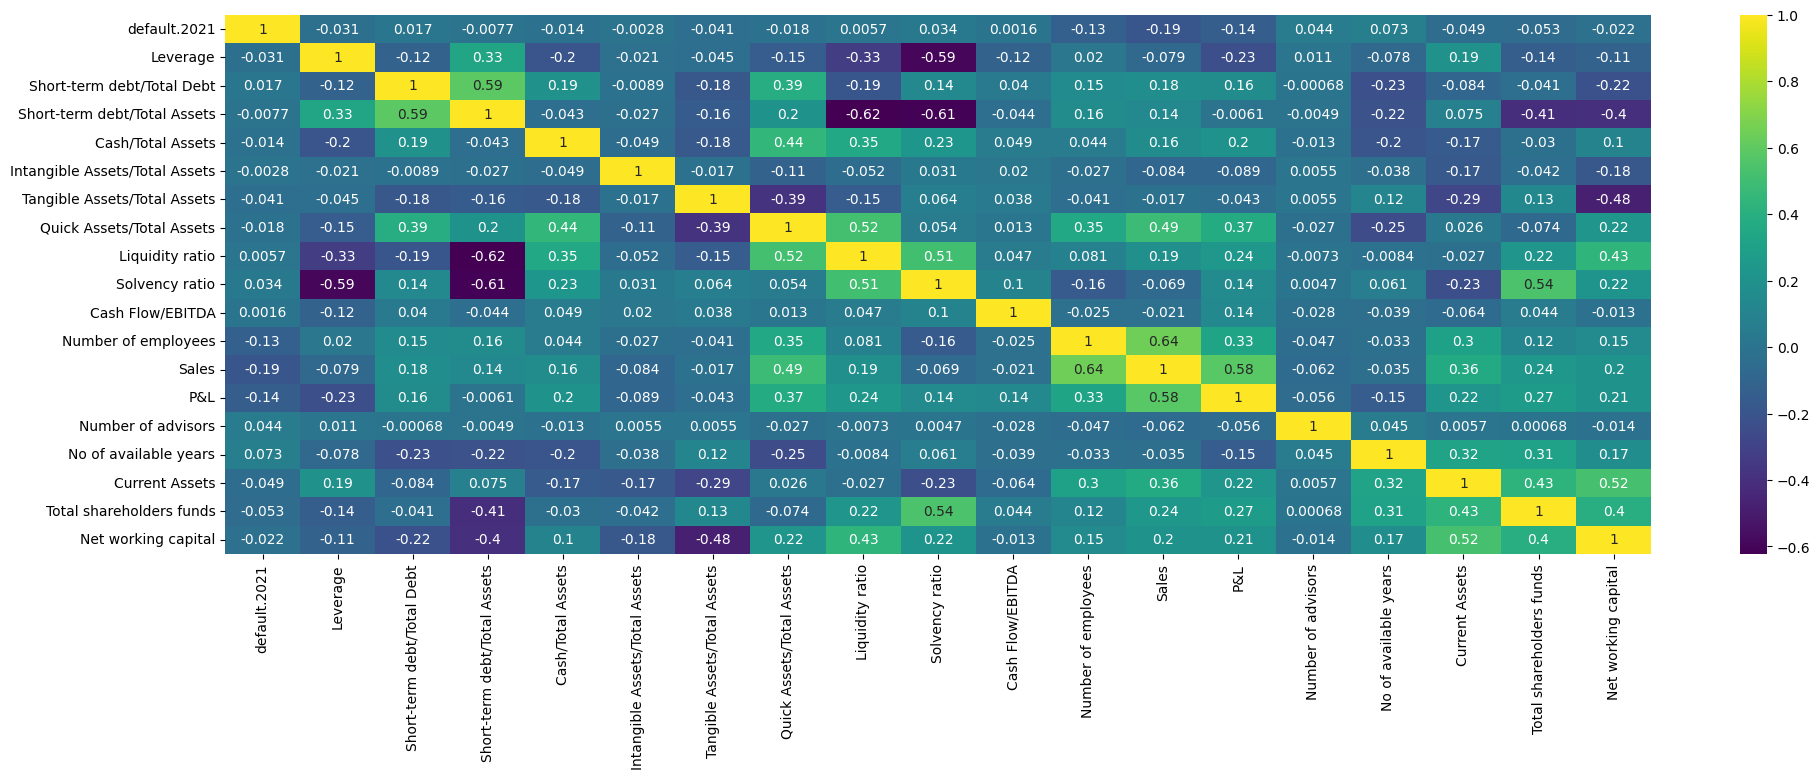

In [ ]:
# checking for multicollinearity after transformation
plt.figure(figsize=(23,7))
sns.heatmap(data_cleaned2.corr(),annot=True,cmap='viridis')
plt.savefig('DataCorrTransform.pdf',dpi='figure', format='pdf')

In [ ]:
from sklearn.model_selection import train_test_split

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Creating the "X" and "y" variables. we drop default.2021 from X
dataX, dataY = data_cleaned2.drop('default.2021', axis=1), data_cleaned2[['default.2021']]

# train is now 70% of the entire data set and test is 30$
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio,random_state=42)

# test and validation are now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),
random_state=42)

In [ ]:
print(y_train['default.2021'].value_counts())

0    47630
1     1420
Name: default.2021, dtype: int64


# Balancing (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
train_ratio = 0.70
val_ratio = 0.15
test_ratio = 0.30

# Creating the "X" and "y" variables. we drop default.2021 from X
dataX, dataY = data_cleaned2.drop('default.2021', axis=1), data_cleaned2[['default.2021']]

# train is now 70% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio,random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),
random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
data_cleaned2.info()
print(y_train_smote.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70072 entries, 6 to 668252
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   default.2021                    70072 non-null  int64  
 1   Leverage                        70072 non-null  float64
 2   Short-term debt/Total Debt      70072 non-null  float64
 3   Short-term debt/Total Assets    70072 non-null  float64
 4   Cash/Total Assets               70072 non-null  float64
 5   Intangible Assets/Total Assets  70072 non-null  float64
 6   Tangible Assets/Total Assets    70072 non-null  float64
 7   Quick Assets/Total Assets       70072 non-null  float64
 8   Liquidity ratio                 70072 non-null  float64
 9   Solvency ratio                  70072 non-null  float64
 10  Cash Flow/EBITDA                70072 non-null  float64
 11  Number of employees             70072 non-null  float64
 12  Sales                          

# Modelling

## **Before SMOTE**

### Lasso

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse

[0.026715674557908645, 0.0270940581659065, 0.027132733562215756, 0.027159105719668685, 0.027200635313863412, 0.02725731208593698, 0.027581509001472566]
[0.007138054965856872, 0.0019569550786823, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0005, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05]


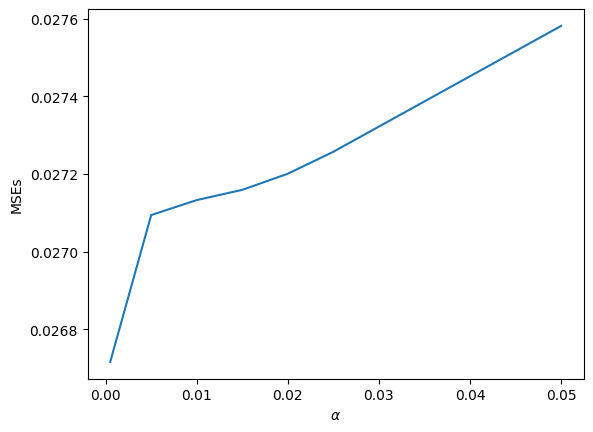

In [ ]:
lmbd = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05,0.1]
alphas=[i*(1/2) for i in lmbd]
mses_lasso=[]
mean_abs_weights_lasso=[]

for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train,y_train)
    pred=lasso.predict(X_val)
    mses_lasso.append(mse(y_val,pred))
    mean_abs_weights_lasso.append(np.abs(lasso.coef_[0]).mean())

print(mses_lasso)
print(mean_abs_weights_lasso)

mses_lasso_table = pd.DataFrame.transpose(pd.DataFrame([lmbd,mses_lasso]))
mses_lasso_table.to_csv("mses_lasso.csv")
maw_lasso_table = pd.DataFrame.transpose(pd.DataFrame([lmbd,mean_abs_weights_lasso]))
maw_lasso_table.to_csv("maw_lasso.csv")

print(alphas)
plt.plot(alphas, mses_lasso)
plt.xlabel(r'$\alpha$')
plt.ylabel('MSEs')
plt.show()

By looking at the mse, we select $\lambda=0.001$ where the $mse$ is $0.02671567$.

*Lasso* with selected alpha

In [ ]:
# We now consider lambda = 0.005 to check
#The alphas are half the lambdas

lasso=Lasso(alpha=0.005/2)
lasso.fit(X_train,y_train)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

coeff_lasso_table = pd.DataFrame(coeffs)
coeff_lasso_table.to_csv("coeff_lasso.csv")

print(coeff_lasso_table)

                                       1
0                                       
intercept                       0.076625
Leverage                        -0.00467
Short-term debt/Total Debt           0.0
Short-term debt/Total Assets         0.0
Cash/Total Assets                    0.0
Intangible Assets/Total Assets      -0.0
Tangible Assets/Total Assets        -0.0
Quick Assets/Total Assets       0.004171
Liquidity ratio                      0.0
Solvency ratio                  0.000197
Cash Flow/EBITDA                     0.0
Number of employees                 -0.0
Sales                          -0.012826
P&L                            -0.003926
Number of advisors                   0.0
No of available years           0.009219
Current Assets                  0.002973
Total shareholders funds       -0.003868
Net working capital             0.000059


Automatic alpha selection

In [ ]:
from sklearn.linear_model import LassoCV # Importing LassoCV

lmbd = [0.001,0.01, 0.02, 0.03, 0.04, 0.05,0.1]
alphas=[i*(1/2) for i in lmbd]

lasso_cv=LassoCV(alphas=alphas)
lasso_cv.fit(X_train,y_train)
print('The selected alpha is:',lasso_cv.alpha_*2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The selected alpha is: 0.001


In [ ]:
#lambda = 0.001 based on the automatic alpha selection

lasso=Lasso(alpha=0.001/2)
lasso.fit(X_train,y_train)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

coeff_lasso_table_new = pd.DataFrame(coeffs)
coeff_lasso_table_new.to_csv("coeff_lasso.csv")

print(coeff_lasso_table_new)

                                       1
0                                       
intercept                       0.017129
Leverage                       -0.007138
Short-term debt/Total Debt      0.012202
Short-term debt/Total Assets         0.0
Cash/Total Assets                   -0.0
Intangible Assets/Total Assets      -0.0
Tangible Assets/Total Assets        -0.0
Quick Assets/Total Assets       0.079647
Liquidity ratio                      0.0
Solvency ratio                  0.000124
Cash Flow/EBITDA                0.000927
Number of employees            -0.003041
Sales                          -0.016507
P&L                            -0.004945
Number of advisors                   0.0
No of available years           0.019537
Current Assets                  0.007558
Total shareholders funds       -0.003591
Net working capital            -0.001167


In [ ]:
#Lasso AUC
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

lasso = GridSearchCV(Lasso(),
                     {'alpha': np.logspace(-10, -8, 5)})
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_performance = roc_auc_score(y_test, lasso_preds)
print('Lasso: Area under the ROC curve = {}'.format(lasso_performance))

Lasso: Area under the ROC curve = 0.8003565761470895


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

Logistic Regression with no penalty

In [ ]:
LogReg0 = LogisticRegression(fit_intercept=True)
LogReg0.fit(X_train,y_train)
y_pred=LogReg0.predict(X_train)
print('Intercept: ', LogReg0.intercept_)
print('Weight:', LogReg0.coef_[0])

# Get the coefficients of each feature
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(LogReg0.intercept_) + list(LogReg0.coef_[0])
    ],
).transpose().set_index(0)

coeffs.columns = ['weight']
coeffs.index.name = 'feature'
coeffs

Intercept:  [-3.58341837]
Weight: [-0.17860075  0.61623282 -0.00622889 -0.29683903 -0.57149686 -1.6678011
  1.7636417   0.09059068 -0.00208643 -0.01690521 -0.47385182 -0.305244
 -0.14839454  0.51695074  0.8571039  -0.09847323 -0.04610699 -0.02711067]


weight
feature                                 
intercept                      -3.583418
Leverage                       -0.178601
Short-term debt/Total Debt      0.616233
Short-term debt/Total Assets   -0.006229
Cash/Total Assets              -0.296839
Intangible Assets/Total Assets -0.571497
Tangible Assets/Total Assets   -1.667801
Quick Assets/Total Assets       1.763642
Liquidity ratio                 0.090591
Solvency ratio                 -0.002086
Cash Flow/EBITDA               -0.016905
Number of employees            -0.473852
Sales                          -0.305244
P&L                            -0.148395
Number of advisors              0.516951
No of available years           0.857104
Current Assets                 -0.098473
Total shareholders funds       -0.046107
Net working capital            -0.027111

Logistic regression with penalisation

In [ ]:
# Call Logistic Regression
regularization_strength = 0.001
LogReg = LogisticRegression(penalty='l1', solver='liblinear', C=regularization_strength)

# Fit training data on logistic regression
LogReg.fit(X_train, y_train)
y_pred=LogReg.predict(X_train)
print('Intercept: ', LogReg.intercept_)
print('Weight:', LogReg.coef_[0])

# Get the coefficients of each feature
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(LogReg.intercept_) + list(LogReg.coef_[0])
    ],
).transpose().set_index(0)

coeffs.columns = ['weight']
coeffs.index.name = 'feature'
coeffs

Intercept:  [0.]
Weight: [-0.05701604  0.          0.          0.          0.          0.
  0.          0.         -0.00996466 -0.09469845  0.         -0.37195877
  0.          0.          0.         -0.24354631  0.          0.        ]


weight
feature                                 
intercept                            0.0
Leverage                       -0.057016
Short-term debt/Total Debt           0.0
Short-term debt/Total Assets         0.0
Cash/Total Assets                    0.0
Intangible Assets/Total Assets       0.0
Tangible Assets/Total Assets         0.0
Quick Assets/Total Assets            0.0
Liquidity ratio                      0.0
Solvency ratio                 -0.009965
Cash Flow/EBITDA               -0.094698
Number of employees                  0.0
Sales                          -0.371959
P&L                                  0.0
Number of advisors                   0.0
No of available years                0.0
Current Assets                 -0.243546
Total shareholders funds             0.0
Net working capital                  0.0

Specificity: 0.9999790048288894
Sensitivity: 0.0
Accuracy: 0.9710295616717635
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.4999895024144447


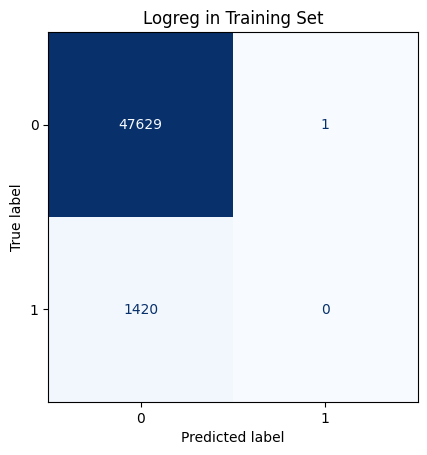

In [ ]:
y_pred_train_lr = LogReg.predict(X_train)

disp = ConfusionMatrixDisplay.from_estimator(LogReg,X_train, y_train, colorbar=False, cmap = 'Blues')
_ = disp.ax_.set_title("Logreg in Training Set")

cm = confusion_matrix(y_train, y_pred_train_lr)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_train, y_pred_train_lr)
precision = precision_score(y_train, y_pred_train_lr)
recall = recall_score(y_train, y_pred_train_lr)
f1 = f1_score(y_train, y_pred_train_lr)
roc_auc = roc_auc_score(y_train, y_pred_train_lr)

# Display all metrics for Training
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

Specificity: 1.0
Sensitivity: 0.0
Accuracy: 0.9711716854573997
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


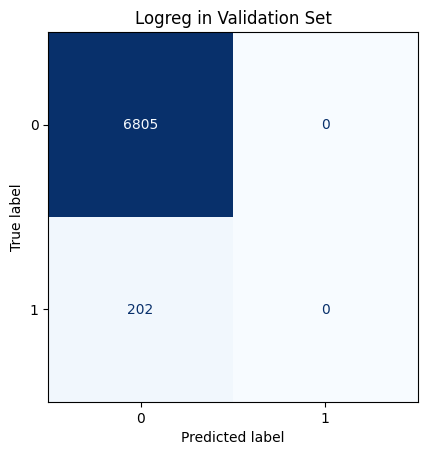

In [ ]:
y_pred_val_lr = LogReg.predict(X_val)

disp = ConfusionMatrixDisplay.from_estimator(LogReg,X_val, y_val, colorbar=False, cmap = 'Blues')
_ = disp.ax_.set_title("Logreg in Validation Set")

cm = confusion_matrix(y_val, y_pred_val_lr)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_val, y_pred_val_lr)
precision = precision_score(y_val, y_pred_val_lr)
recall = recall_score(y_val, y_pred_val_lr)
f1 = f1_score(y_val, y_pred_val_lr)
roc_auc = roc_auc_score(y_val, y_pred_val_lr)

# Display all metrics for Training
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

Specificity: 0.999852843793687
Sensitivity: 0.0
Accuracy: 0.9696039957188727
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.4999264218968435


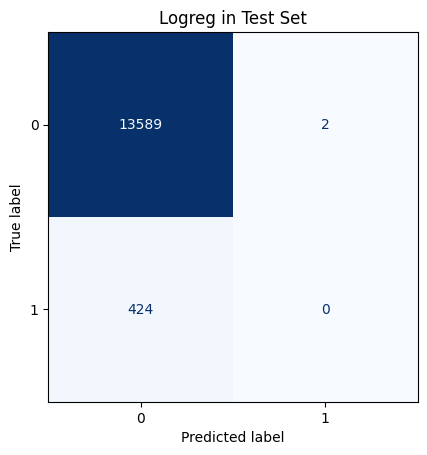

In [ ]:
y_pred_test_lr = LogReg.predict(X_test)

disp = ConfusionMatrixDisplay.from_estimator(LogReg,X_test, y_test, colorbar=False, cmap = 'Blues')
_ = disp.ax_.set_title("Logreg in Test Set")

cm = confusion_matrix(y_test, y_pred_test_lr)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_test_lr)
precision = precision_score(y_test, y_pred_test_lr)
recall = recall_score(y_test, y_pred_test_lr)
f1 = f1_score(y_test, y_pred_test_lr)
roc_auc = roc_auc_score(y_test, y_pred_test_lr)

# Display all metrics for Training
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.7469910075612186


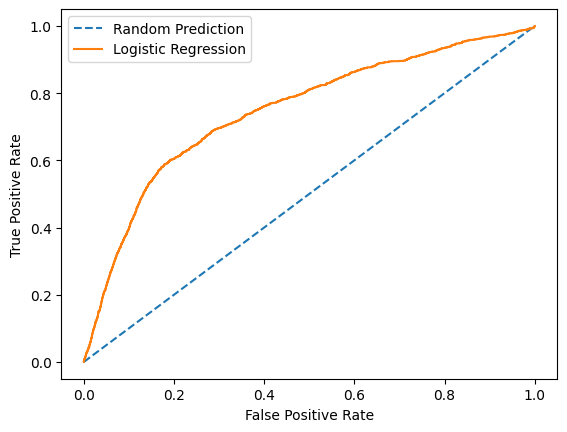

In [ ]:
#ROC for training set
lr_prob=LogReg.predict_proba(X_train)
lr_prob=lr_prob[:,1]
ns_prob=[0 for _ in range(len(y_train))]
ns_auc=roc_auc_score(y_train, ns_prob)
lr_auc=roc_auc_score(y_train,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_train,ns_prob)
lr_fpr,lr_tpr,threshold_train=roc_curve(y_train,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC random predictions = 0.5
AUC predictions from logistic regression model on training = 0.7469910075612186
AUC predictions from logistic regression model on validation = 0.7098355169829987


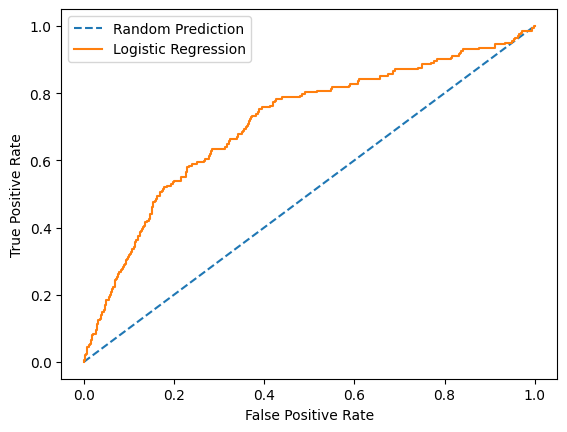

In [ ]:
# ROC and the AUC for val set

lr_prob_val=LogReg.predict_proba(X_val)
lr_prob_val=lr_prob_val[:, 1]
ns_prob_val=[0 for _ in range(len(y_val))]
ns_auc_val=roc_auc_score(y_val, ns_prob_val)
lr_auc_val=roc_auc_score(y_val,lr_prob_val)
print("AUC random predictions =", ns_auc_val)
print("AUC predictions from logistic regression model on training =", lr_auc)
print("AUC predictions from logistic regression model on validation =", lr_auc_val)
ns_fpr_val,ns_tpr_val,_=roc_curve(y_val,ns_prob_val)
lr_fpr_val,lr_tpr_val,threshold_val=roc_curve(y_val,lr_prob_val)

plt.plot(ns_fpr_val,ns_tpr_val,linestyle='--',label='Random Prediction')
plt.plot(lr_fpr_val,lr_tpr_val,label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC random predictions = 0.5
AUC predictions from logistic regression model on training = 0.7469910075612186
AUC predictions from logistic regression model on validation = 0.7098355169829987
AUC predictions from logistic regression model on test = 0.7393068803856047


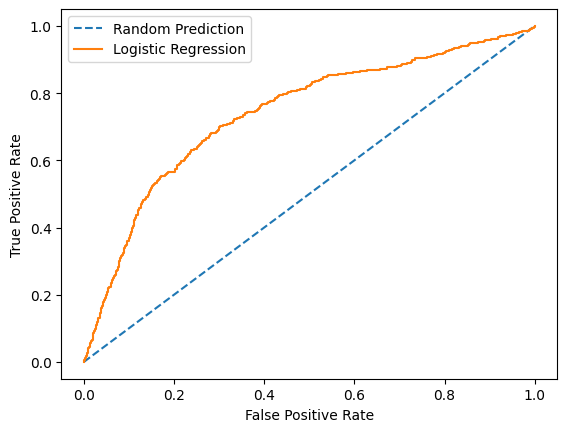

In [ ]:
# ROC and the AUC for test set

lr_prob_test=LogReg.predict_proba(X_test)
lr_prob_test=lr_prob_test[:, 1]
ns_prob_test=[0 for _ in range(len(y_test))]
ns_auc_test=roc_auc_score(y_test, ns_prob_test)
lr_auc_test=roc_auc_score(y_test,lr_prob_test)
print("AUC random predictions =", ns_auc_test)
print("AUC predictions from logistic regression model on training =", lr_auc)
print("AUC predictions from logistic regression model on validation =", lr_auc_val)
print("AUC predictions from logistic regression model on test =", lr_auc_test)
ns_fpr_test,ns_tpr_test,_=roc_curve(y_test,ns_prob_test)
lr_fpr_test,lr_tpr_test,threshold_test=roc_curve(y_test,lr_prob_test)

plt.plot(ns_fpr_test,ns_tpr_test,linestyle='--',label='Random Prediction')
plt.plot(lr_fpr_test,lr_tpr_test,label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Probabilities investigation with Logistic regression

In [ ]:
# Threshold values
threshold = [.1, .2, .5, .8, .9]

# Create a dataframe to store results
results = pd.DataFrame(columns=["Threshold", "Accuracy", "TP rate", "TN rate", "FP rate", "Precision", "f-score"])

# Fill in the Threshold column
results['Threshold'] = threshold

# Initialize index variable
j = 0

# Iterate over the thresholds
for i in threshold:

    # If probability for the test set > threshold, predict 1
    preds = np.where(LogReg.predict_proba(X_test)[:, 1] > i, 1, 0)

    # Create confusion matrix in percentage
    cm = (confusion_matrix(y_test, preds, labels=[1, 0], sample_weight=None) / len(y_test)) * 100

    # Display the confusion matrix for the current threshold
    print('Confusion matrix for threshold =', i)
    print(' ')

    TP = cm[0][0]  # True Positives
    FN = cm[0][1]  # False Positives
    FP = cm[1][0]  # True Negatives
    TN = cm[1][1]  # False Negatives

    ConMat = pd.DataFrame(
        [
            [cm[0][0], cm[0][1]],
            [cm[1][0], cm[1][1]]
        ], columns=['y_hat_1', 'y_hat_0']
    )
    ConMat.rename(index={0: 'y_1'}, inplace=True)
    ConMat.rename(index={1: 'y_0'}, inplace=True)

    print(ConMat)

    # Fill in the results dataframe
    results.iloc[j, 1] = accuracy_score(y_test, preds)
    results.iloc[j, 2] = recall_score(y_test, preds)
    results.iloc[j, 3] = TN / (TN + FP)  # Specificity
    results.iloc[j, 4] = TP / (TP + FN)  # Sensitivity
    results.iloc[j, 5] = precision_score(y_test, preds)
    results.iloc[j, 6] = f1_score(y_test, preds)

    j += 1

# Display all evaluation metrics
print('ALL METRICS')
print(results.T)

Confusion matrix for threshold = 0.1
 
      y_hat_1    y_hat_0
y_1  0.977524   2.047806
y_0  8.440956  88.533714
Confusion matrix for threshold = 0.2
 
      y_hat_1    y_hat_0
y_1  0.135569   2.889761
y_0  1.212986  95.761684
Confusion matrix for threshold = 0.5
 
     y_hat_1   y_hat_0
y_1  0.00000   3.02533
y_0  0.01427  96.96040
Confusion matrix for threshold = 0.8
 
     y_hat_1   y_hat_0
y_1      0.0   3.02533
y_0      0.0  96.97467
Confusion matrix for threshold = 0.9
 
     y_hat_1   y_hat_0
y_1      0.0   3.02533
y_0      0.0  96.97467
ALL METRICS
                  0         1         2         3         4
Threshold       0.1       0.2       0.5       0.8       0.9
Accuracy   0.895112  0.958973  0.969604  0.969747  0.969747
TP rate    0.323113  0.044811       0.0       0.0       0.0
TN rate    0.912957  0.987492  0.999853       1.0       1.0
FP rate    0.323113  0.044811       0.0       0.0       0.0
Precision  0.103788  0.100529       0.0       0.0       0.0
f-score     0.15

The optimal threshold z is  0.044838918210926074
The TP rate according the optimal threshold z is  0.602112676056338
The FP rate according the optimal threshold z is  0.1923157673735041


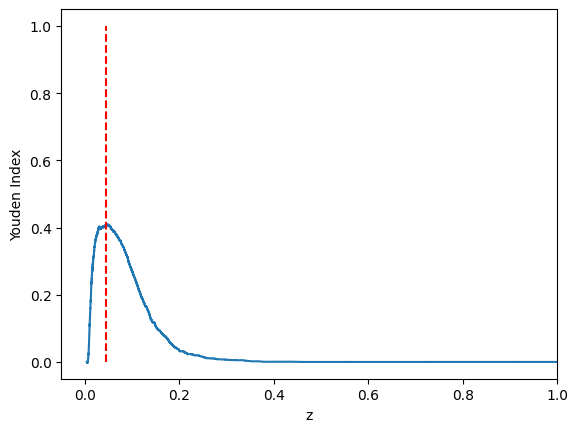

In [ ]:
J = lr_tpr-lr_fpr
J_z_opt = np.argmax(J, axis=0)
print("The optimal threshold z is ",threshold_train[J_z_opt])
print("The TP rate according the optimal threshold z is ",lr_tpr[J_z_opt])
print("The FP rate according the optimal threshold z is ",lr_fpr[J_z_opt])

plt.plot(threshold_train,J)
plt.vlines(threshold_train[J_z_opt],0,1,'red','dashed')
plt.xlabel("z")
plt.ylabel("Youden Index")
plt.xlim((-0.05,1))
plt.ylim((-0.05,1.05))
pd.DataFrame({"z":threshold_train,"j":J}).to_csv("Youden_stat.csv",index=False)

In [ ]:
#on training
preds_train_j= np.where(LogReg.predict_proba(X_train)[:,1] > threshold_train[J_z_opt],1,0)
# create confusion matrix in percentage
cm_j = (confusion_matrix(y_train, preds_train_j,labels=[1,0]) / len(y_train))

TP_j = cm_j[0][0] # True Positives
FN_j = cm_j[0][1] # False Positives
FP_j = cm_j[1][0] # True Negatives
TN_j = cm_j[1][1] # False Negatives

TPR_j = TP_j/(TP_j+FN_j) # True positive rate
FPR_j = FP_j/(FP_j+TN_j) # False positive rate

print('Training set TPR and FPR using the optimal threshold =',threshold_train[J_z_opt])
print('TPR:', TPR_j)
print('FPR:', FPR_j)

Training set TPR and FPR using the optimal threshold = 0.044838918210926074
TPR: 0.6014084507042253
FPR: 0.1923157673735041


### Two Class SVM

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      1.00      0.00      0.99      0.00      0.00      6805
          1       0.00      0.00      1.00      0.00      0.00      0.00       202

avg / total       0.94      0.97      0.03      0.96      0.00      0.00      7007

Specificity: 1.0000
Sensitivity: 0.0000
Accuracy: 0.9712
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.5000


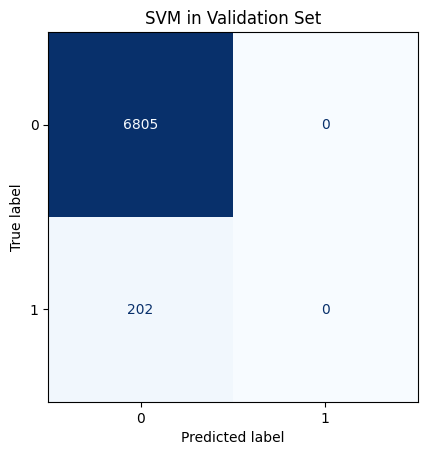

In [ ]:
from sklearn.svm import SVC
import warnings
import numpy as np
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Initialize the SVM classifier with the RBF kernel and Prob.
svm_rbf_prob = SVC(kernel='rbf', probability=True)
# Train on the SMOTE train data
svm_rbf_prob.fit(X_train, y_train)  # Ensure y_train is 1D

# Predict on validation data and create the Validation CM
y_pred_val = svm_rbf_prob.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val)

print(classification_report_imbalanced(y_val, y_pred_val))


# Visualize the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    svm_rbf_prob,
    X_val, y_val,
    colorbar=False,
    cmap='Blues'  # Change the color map here
)
_ = disp.ax_.set_title("SVM in Validation Set")

# Calculate evaluation metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, zero_division=0)  # Handle zero division
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, zero_division=0)  # Handle zero division
roc_auc = roc_auc_score(y_val, y_pred_val)

# Display all metrics for Validation
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

# Print the metrics
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")  # Print each metric to 4 decimal places


                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      1.00      0.00      0.98      0.00      0.00     13591
          1       0.00      0.00      1.00      0.00      0.00      0.00       424

avg / total       0.94      0.97      0.03      0.95      0.00      0.00     14015

Specificity: 1.0000
Sensitivity: 0.0000
Accuracy: 0.9697
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC Score: 0.5000


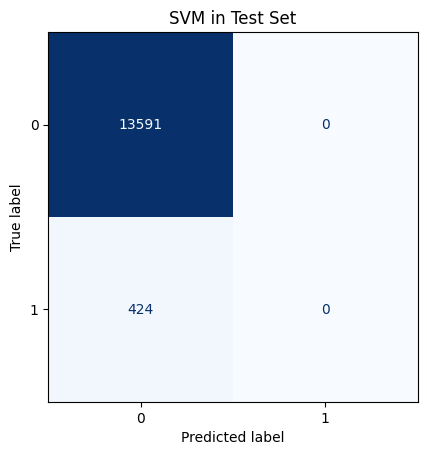

In [ ]:
#Predict on test data and create Test CM
y_pred_test_sv = svm_rbf_prob.predict(X_test)
cm= confusion_matrix(y_test, y_pred_test_sv)


print(classification_report_imbalanced(y_test, y_pred_test_sv))




# Visualize the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    svm_rbf_prob,
    X_test, y_test,
    colorbar=False,
    cmap='Blues'  # Change the color map here
)
_ = disp.ax_.set_title("SVM in Test Set")

# Calculate evaluation metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_test_sv )
precision = precision_score(y_test, y_pred_test_sv , zero_division=0)  # Handle zero division
recall = recall_score(y_test, y_pred_test_sv)
f1 = f1_score(y_test, y_pred_test_sv, zero_division=0)  # Handle zero division
roc_auc = roc_auc_score(y_test, y_pred_test_sv)

# Display all metrics for Validation
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

# Print the metrics
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")  # Print each metric to 4 decimal places




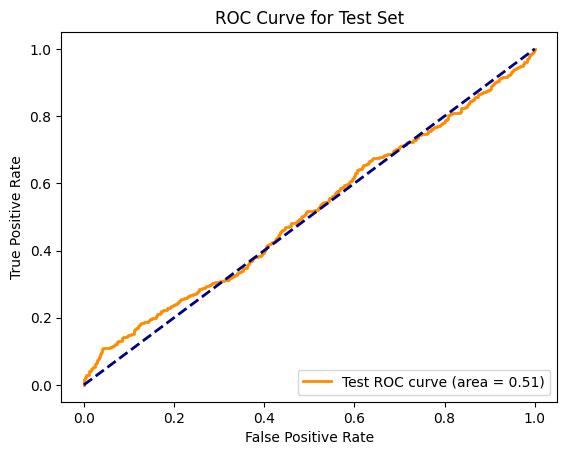

AUC Score for Test Set: 0.51


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_prob_test_sv = svm_rbf_prob.predict_proba(X_test)[:, 1]

#  ROC curve values for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test_sv)
roc_auc_test = roc_auc_score(y_test, y_prob_test_sv)

# Plot ROC curve for the test set
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score for the test set
print(f"AUC Score for Test Set: {roc_auc_test:.2f}")


### XGBoost

In [ ]:
#find the best combination of parameters
from xgboost import XGBClassifier
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import confusion_matrix

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Define parameter grid
param_grid = {
    'n_estimators': range(1,21),
    'max_depth': [2,3,4,5],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5]
}

# Initialize best score and best parameters
best_gm_score = 0
best_diff_score = float('inf')  # Initialize with positive infinity
best_params = {}

# Iterate over parameter combinations
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            # Instantiate XGBoost classifier with current parameters
            xgb_classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, n_jobs=-1, random_state=42,objective='binary:logistic',eval_metric='auc')

            # Fit classifier
            xgb_classifier.fit(X_train, y_train)

            # Predict on validation set
            y_pred_val = xgb_classifier.predict(X_val)

            # Calculate confusion matrix
            cm = confusion_matrix(y_val, y_pred_val)
            tn, fp, fn, tp = cm.ravel()

            # Calculate specificity and sensitivity
            specificity = tn / (tn + fp)
            sensitivity = tp / (tp + fn)

            # Calculate geometric mean
            gm_score = np.sqrt(specificity * sensitivity)

            # Calculate difference between specificity and sensitivity
            diff_score = abs(specificity - sensitivity)

            # Update best parameters based on both conditions
            if gm_score > best_gm_score:
                best_gm_score = gm_score
                best_diff_score = diff_score
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

print("Best parameters:", best_params)
print("Best geometric mean score:", best_gm_score)
print("Best difference between specificity and sensitivity:", best_diff_score)


Best parameters: {'n_estimators': 13, 'max_depth': 5, 'learning_rate': 0.5}
Best geometric mean score: 0.17230750324297398
Best difference between specificity and sensitivity: 0.9698561773884956


In [ ]:
# instantiate the classifier n_estimators=5, max_depth=2, n_jobs=-1, learning_rate=0.2, random_state=42
xgb_classifier = XGBClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], n_jobs=-1, learning_rate=best_params['learning_rate'], random_state=42,objective='binary:logistic',eval_metric='auc')


# fit the classifier to the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=13, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

<Figure size 2e+06x1e+06 with 0 Axes>

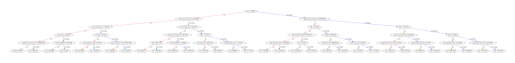

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the final tree
plt.figure(figsize=(20000, 10000))  # Adjust figure size as needed
plot_tree(xgb_classifier,num_trees=1)
plt.show()

Specificity: 0.99934914969557
Sensitivity: 0.07676056338028169
Accuracy: 0.9726401630988787
Precision: 0.7785714285714286
Recall: 0.07676056338028169
F1 Score: 0.13974358974358972
ROC AUC Score: 0.5380548565379258


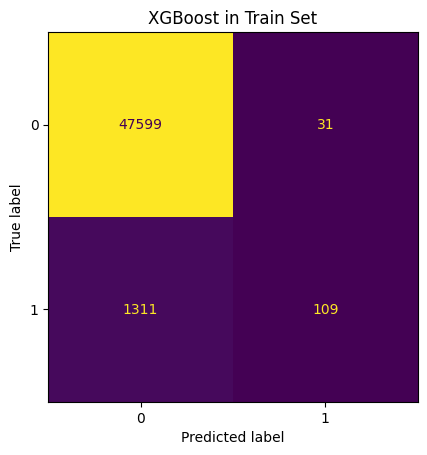

In [ ]:
#Confusion Matrix for training
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import classification_report_imbalanced

y_pred_train = xgb_classifier.predict(X_train)


disp = ConfusionMatrixDisplay.from_estimator(xgb_classifier,X_train, y_train, colorbar=False)
_ = disp.ax_.set_title("XGBoost in Train Set")

 # Calculate evaluation metrics
cm = confusion_matrix(y_train, y_pred_train)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)
roc_auc = roc_auc_score(y_train, y_pred_train)

# Display all metrics for Training
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

Specificity: 0.9995591476855253
Sensitivity: 0.0297029702970297
Accuracy: 0.9715998287426859
Precision: 0.6666666666666666
Recall: 0.0297029702970297
F1 Score: 0.056872037914691934
ROC AUC Score: 0.5146310589912775


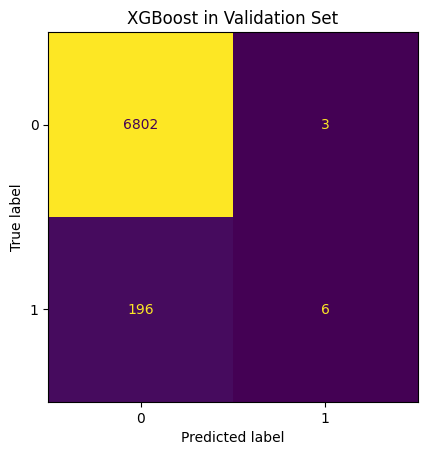

In [ ]:
#Confusion Matrix for validation

y_pred_val = xgb_classifier.predict(X_val)

#print(classification_report_imbalanced(y_val, y_pred_val))

disp = ConfusionMatrixDisplay.from_estimator(xgb_classifier,X_val, y_val, colorbar=False)
_ = disp.ax_.set_title("XGBoost in Validation Set")

 # Calculate evaluation metrics
cm = confusion_matrix(y_val, y_pred_val)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_pred_val)

# Display all metrics for Validation
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")



Specificity: 0.998969906555809
Sensitivity: 0.030660377358490566
Accuracy: 0.9696753478415983
Precision: 0.48148148148148145
Recall: 0.030660377358490566
F1 Score: 0.05764966740576497
ROC AUC Score: 0.5148151419571498


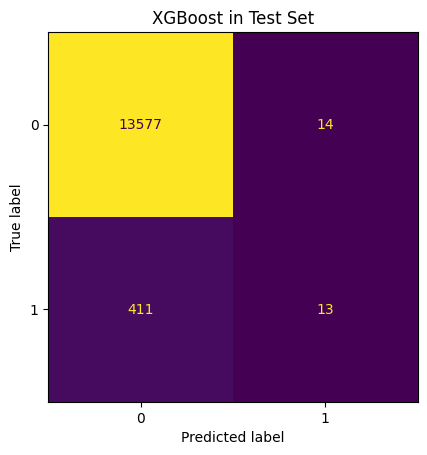

In [ ]:
#Confusion Matrix for test

y_pred_test = xgb_classifier.predict(X_test)

#print(classification_report_imbalanced(y_test, y_pred_test))

disp = ConfusionMatrixDisplay.from_estimator(xgb_classifier,X_test, y_test, colorbar=False)
_ = disp.ax_.set_title("XGBoost in Test Set")

 # Calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred_test)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_pred_test)

# Display all metrics for Testing
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

## After SMOTE

### Lasso + SMOTE

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse

Lasso Regression with different alpha values

[0.16154399887383883, 0.1642805244007376, 0.16921290799030553, 0.1741226047256363, 0.1755894032738646, 0.1773271262520643, 0.18172194215147994]
[0.011830069019303844, 0.0023224423345693523, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0005, 0.005, 0.01, 0.015, 0.02, 0.025, 0.05]


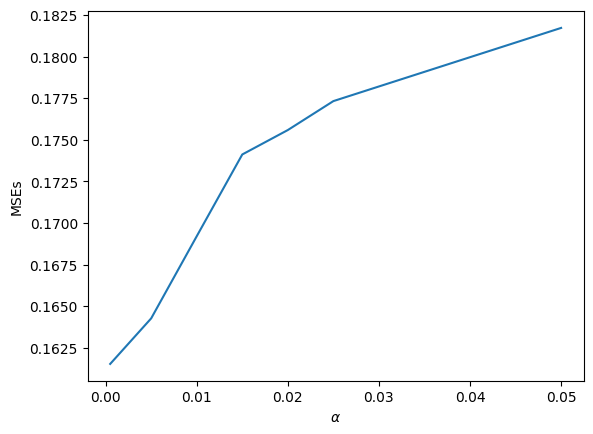

In [ ]:
lmbd = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05,0.1]
alphas=[i*(1/2) for i in lmbd]
mses_lasso=[]
mean_abs_weights_lasso=[]

for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train_smote,y_train_smote)
    pred=lasso.predict(X_val)
    mses_lasso.append(mse(y_val,pred))
    mean_abs_weights_lasso.append(np.abs(lasso.coef_[0]).mean())

print(mses_lasso)
print(mean_abs_weights_lasso)

mses_lasso_table = pd.DataFrame.transpose(pd.DataFrame([lmbd,mses_lasso]))
mses_lasso_table.to_csv("mses_lasso.csv")
maw_lasso_table = pd.DataFrame.transpose(pd.DataFrame([lmbd,mean_abs_weights_lasso]))
maw_lasso_table.to_csv("maw_lasso.csv")

print(alphas)
plt.plot(alphas, mses_lasso)
plt.xlabel(r'$\alpha$')
plt.ylabel('MSEs')
plt.show()

By looking at the mse, we select $\lambda=0.001$ where the $mse$ is $0.16154$.

Lasso regression with specific alpha

In [ ]:
# We now consider lambda = 0.005 to check the penalization strength
#The alphas are half the lambdas

lasso=Lasso(alpha=0.005/2)
lasso.fit(X_train_smote,y_train_smote)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train_smote.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

coeff_lasso_table = pd.DataFrame(coeffs)
coeff_lasso_table.to_csv("coeff_lasso.csv")

print(coeff_lasso_table)

                                       1
0                                       
intercept                       0.323267
Leverage                       -0.007088
Short-term debt/Total Debt      0.145762
Short-term debt/Total Assets         0.0
Cash/Total Assets                   -0.0
Intangible Assets/Total Assets      -0.0
Tangible Assets/Total Assets   -0.147677
Quick Assets/Total Assets       0.272582
Liquidity ratio                      0.0
Solvency ratio                  0.001329
Cash Flow/EBITDA                 0.00315
Number of employees            -0.082906
Sales                          -0.059552
P&L                            -0.029126
Number of advisors                   0.0
No of available years           0.130526
Current Assets                  0.013975
Total shareholders funds       -0.031965
Net working capital            -0.000686


Lasso CV for automatic Alpha Selection

In [ ]:
from sklearn.linear_model import LassoCV # Importing LassoCV

lmbd = [0.001,0.01, 0.02, 0.03, 0.04, 0.05,0.1]
alphas=[i*(1/2) for i in lmbd]

lasso_cv=LassoCV(alphas=alphas)
lasso_cv.fit(X_train_smote,y_train_smote)
print('The selected alpha is:',lasso_cv.alpha_*2)

The selected alpha is: 0.001


In [ ]:
# We now consider different lambda values. The alphas are half the lambdas
#lambda = 0.001 based on the automatic alpha selection

lasso=Lasso(alpha=0.001/2)
lasso.fit(X_train_smote,y_train_smote)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train_smote.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)
coeffs

coeff_lasso_table_new = pd.DataFrame(coeffs)
coeff_lasso_table_new.to_csv("coeff_lasso.csv")

print(coeff_lasso_table_new)

                                       1
0                                       
intercept                       0.257713
Leverage                        -0.01183
Short-term debt/Total Debt      0.173958
Short-term debt/Total Assets    0.096427
Cash/Total Assets              -0.047268
Intangible Assets/Total Assets      -0.0
Tangible Assets/Total Assets   -0.280324
Quick Assets/Total Assets       0.251542
Liquidity ratio                 0.033281
Solvency ratio                   0.00118
Cash Flow/EBITDA                0.004582
Number of employees            -0.088949
Sales                          -0.057548
P&L                            -0.028899
Number of advisors              0.029866
No of available years           0.144139
Current Assets                  0.008146
Total shareholders funds        -0.02555
Net working capital            -0.003647


In [ ]:
#Lasso AUC
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

lasso = GridSearchCV(Lasso(),
                     {'alpha': np.logspace(-10, -8, 5)})
lasso.fit(X_train_smote, y_train_smote)
lasso_preds = lasso.predict(X_test)
lasso_performance = roc_auc_score(y_test, lasso_preds)
print('Lasso: Area under the ROC curve = {}'.format(lasso_performance))

Lasso: Area under the ROC curve = 0.8150709820455545


### Logistic Regression + SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

Logistic regression with no penalty

In [ ]:
LogReg0 = LogisticRegression(fit_intercept=True)
LogReg0.fit(X_train_smote,y_train_smote)
y_pred=LogReg0.predict(X_train_smote)
print('Intercept: ', LogReg0.intercept_)
print('Weight:', LogReg0.coef_[0])

# Get the coefficients of each feature
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train_smote.columns),
        list(LogReg0.intercept_) + list(LogReg0.coef_[0])
    ],
).transpose().set_index(0)

coeffs.columns = ['weight']
coeffs.index.name = 'feature'
coeffs

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept:  [-0.76975973]
Weight: [-1.50710363e-01  1.03897719e+00  8.19685623e-01 -1.50417167e-01
 -1.13108100e-01 -1.32541137e+00  1.55898454e+00  1.39043380e-01
  1.10600889e-03  6.75864677e-03 -6.03245572e-01 -2.97716793e-01
 -1.54277678e-01  2.81387323e-01  6.71147484e-01 -5.40559585e-02
 -6.28193445e-02  7.46325763e-03]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


weight
feature                                 
intercept                       -0.76976
Leverage                        -0.15071
Short-term debt/Total Debt      1.038977
Short-term debt/Total Assets    0.819686
Cash/Total Assets              -0.150417
Intangible Assets/Total Assets -0.113108
Tangible Assets/Total Assets   -1.325411
Quick Assets/Total Assets       1.558985
Liquidity ratio                 0.139043
Solvency ratio                  0.001106
Cash Flow/EBITDA                0.006759
Number of employees            -0.603246
Sales                          -0.297717
P&L                            -0.154278
Number of advisors              0.281387
No of available years           0.671147
Current Assets                 -0.054056
Total shareholders funds       -0.062819
Net working capital             0.007463

Logistic regression with penalty

In [ ]:
# Call Logistic Regression
regularization_strength = 0.001
LogReg = LogisticRegression(penalty='l1', solver='liblinear', C=regularization_strength)

# Fit training data on logistic regression
LogReg.fit(X_train_smote, y_train_smote)
y_pred=LogReg.predict(X_train_smote)
print('Intercept: ', LogReg.intercept_)
print('Weight:', LogReg.coef_[0])

# Get the coefficients of each feature
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train_smote.columns),
        list(LogReg.intercept_) + list(LogReg.coef_[0])
    ],
).transpose().set_index(0)

coeffs.columns = ['weight']
coeffs.index.name = 'feature'
coeffs

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept:  [0.]
Weight: [ 0.          0.          0.          0.          0.          0.
  0.67258143  0.          0.01122402  0.         -0.27562353 -0.28100248
 -0.13831428  0.          0.44660381  0.08903142 -0.20844761  0.00693656]


weight
feature                                 
intercept                            0.0
Leverage                             0.0
Short-term debt/Total Debt           0.0
Short-term debt/Total Assets         0.0
Cash/Total Assets                    0.0
Intangible Assets/Total Assets       0.0
Tangible Assets/Total Assets         0.0
Quick Assets/Total Assets       0.672581
Liquidity ratio                      0.0
Solvency ratio                  0.011224
Cash Flow/EBITDA                     0.0
Number of employees            -0.275624
Sales                          -0.281002
P&L                            -0.138314
Number of advisors                   0.0
No of available years           0.446604
Current Assets                  0.089031
Total shareholders funds       -0.208448
Net working capital             0.006937

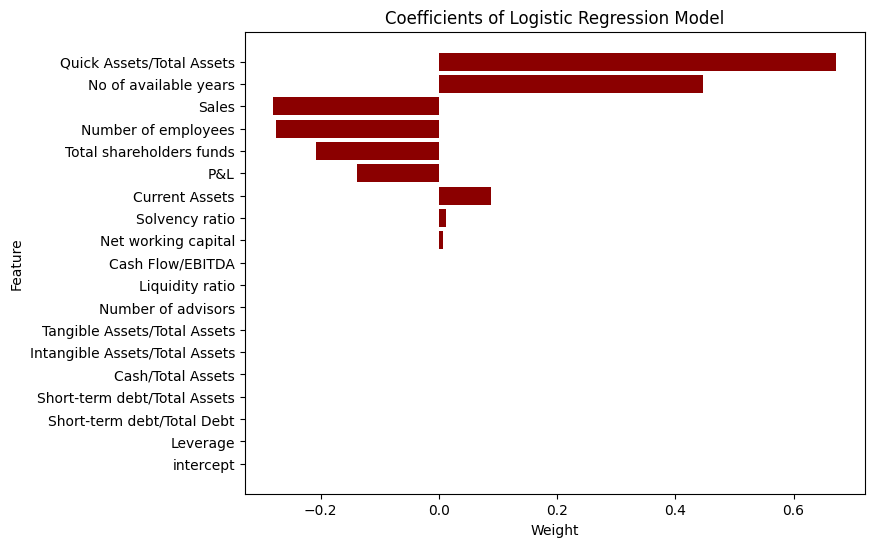

In [ ]:
coeffs_sorted = coeffs.iloc[coeffs['weight'].abs().argsort()]

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(coeffs_sorted.index, coeffs_sorted['weight'], color="darkred")

# Customize the plot
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model')

# Show the plot
plt.show()

Specificity: 0.7807684232626496
Sensitivity: 0.7016586185177409
Accuracy: 0.7412135208901952
Precision: 0.7619351602754092
Recall: 0.7016586185177409
F1 Score: 0.7305556769990819
ROC AUC Score: 0.7412135208901953


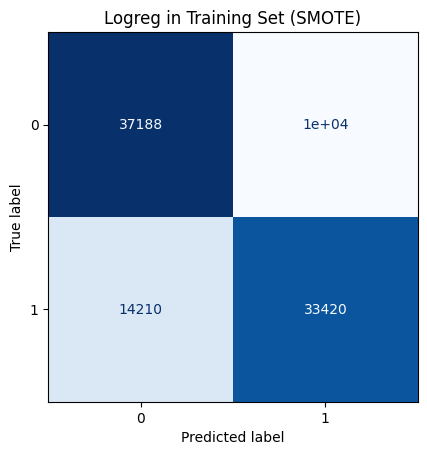

In [ ]:
y_pred_train_smote_lr = LogReg.predict(X_train_smote)

disp = ConfusionMatrixDisplay.from_estimator(LogReg,X_train_smote, y_train_smote, colorbar=False, cmap = 'Blues')
_ = disp.ax_.set_title("Logreg in Training Set (SMOTE)")

cm = confusion_matrix(y_train_smote, y_pred_train_smote_lr)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_train_smote, y_pred_train_smote_lr)
precision = precision_score(y_train_smote, y_pred_train_smote_lr)
recall = recall_score(y_train_smote, y_pred_train_smote_lr)
f1 = f1_score(y_train_smote, y_pred_train_smote_lr)
roc_auc = roc_auc_score(y_train_smote, y_pred_train_smote_lr)

# Display all metrics for Training
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

Specificity: 0.7876561351947098
Sensitivity: 0.6683168316831684
Accuracy: 0.7842157842157842
Precision: 0.08544303797468354
Recall: 0.6683168316831684
F1 Score: 0.1515151515151515
ROC AUC Score: 0.7279864834389391


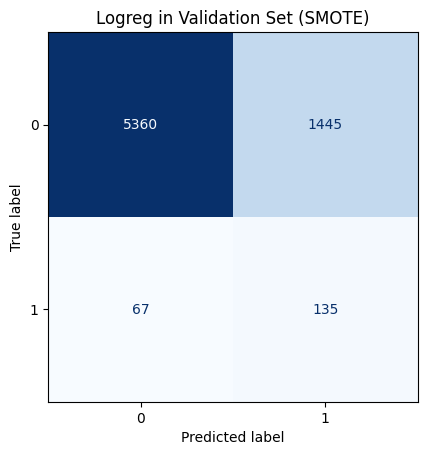

In [ ]:
y_pred_val_smote_lr = LogReg.predict(X_val)

disp = ConfusionMatrixDisplay.from_estimator(LogReg,X_val, y_val, colorbar=False, cmap = 'Blues')
_ = disp.ax_.set_title("Logreg in Validation Set (SMOTE)")

cm = confusion_matrix(y_val, y_pred_val_smote_lr)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_val, y_pred_val_smote_lr)
precision = precision_score(y_val, y_pred_val_smote_lr)
recall = recall_score(y_val, y_pred_val_smote_lr)
f1 = f1_score(y_val, y_pred_val_smote_lr)
roc_auc = roc_auc_score(y_val, y_pred_val_smote_lr)

# Display all metrics for Training
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

Specificity: 0.7809579869030976
Sensitivity: 0.6863207547169812
Accuracy: 0.7780948983232251
Precision: 0.0890452876376989
Recall: 0.6863207547169812
F1 Score: 0.15763813651137593
ROC AUC Score: 0.7336393708100394


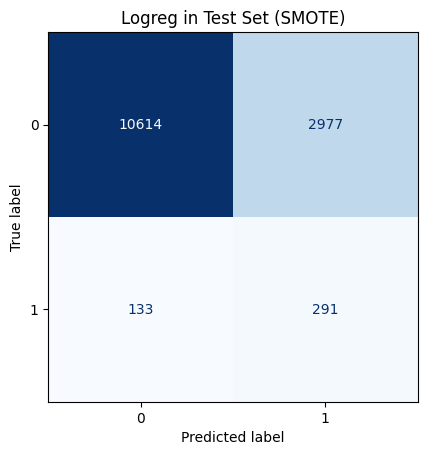

In [ ]:
y_pred_test_smote_lr = LogReg.predict(X_test)

disp = ConfusionMatrixDisplay.from_estimator(LogReg,X_test, y_test, colorbar=False, cmap = 'Blues')
_ = disp.ax_.set_title("Logreg in Test Set (SMOTE)")

cm = confusion_matrix(y_test, y_pred_test_smote_lr)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_test_smote_lr)
precision = precision_score(y_test, y_pred_test_smote_lr)
recall = recall_score(y_test, y_pred_test_smote_lr)
f1 = f1_score(y_test, y_pred_test_smote_lr)
roc_auc = roc_auc_score(y_test, y_pred_test_smote_lr)

# Display all metrics for Training
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.8123826204415562


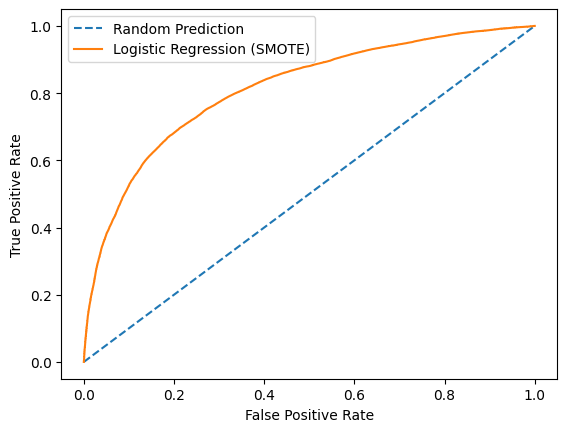

In [ ]:
#ROC for training set
lr_prob_smote=LogReg.predict_proba(X_train_smote)[:,1]
ns_prob=[0 for _ in range(len(y_train_smote))]
ns_auc=roc_auc_score(y_train_smote, ns_prob)
lr_auc=roc_auc_score(y_train_smote,lr_prob_smote)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_train_smote,ns_prob)
lr_fpr,lr_tpr,threshold_train=roc_curve(y_train_smote,lr_prob_smote)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(lr_fpr,lr_tpr,label='Logistic Regression (SMOTE)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC random predictions = 0.5
AUC predictions from logistic regression model on training = 0.8123826204415562
AUC predictions from logistic regression model on validation = 0.7924851412400609


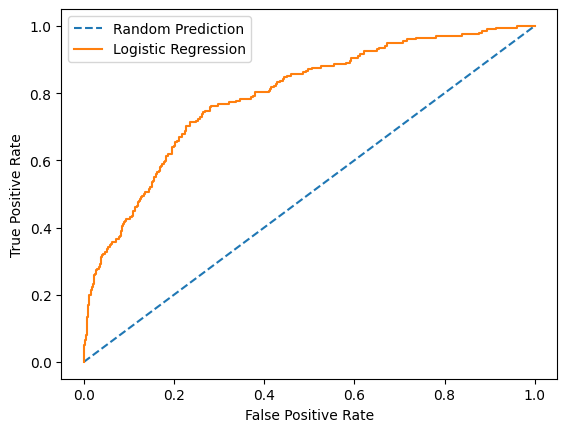

In [ ]:
# ROC and the AUC for val set

lr_prob_val_smote=LogReg.predict_proba(X_val)[:,1]
ns_prob_val=[0 for _ in range(len(y_val))]
ns_auc_val=roc_auc_score(y_val, ns_prob_val)
lr_auc_val=roc_auc_score(y_val,lr_prob_val_smote)
print("AUC random predictions =", ns_auc_val)
print("AUC predictions from logistic regression model on training =", lr_auc)
print("AUC predictions from logistic regression model on validation =", lr_auc_val)
ns_fpr_val,ns_tpr_val,_=roc_curve(y_val,ns_prob_val)
lr_fpr_val,lr_tpr_val,threshold_val=roc_curve(y_val,lr_prob_val_smote)

plt.plot(ns_fpr_val,ns_tpr_val,linestyle='--',label='Random Prediction')
plt.plot(lr_fpr_val,lr_tpr_val,label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

AUC random predictions = 0.5
AUC predictions from logistic regression model on training = 0.8123826204415562
AUC predictions from logistic regression model on validation = 0.7924851412400609
AUC predictions from logistic regression model on test = 0.8074946933528432


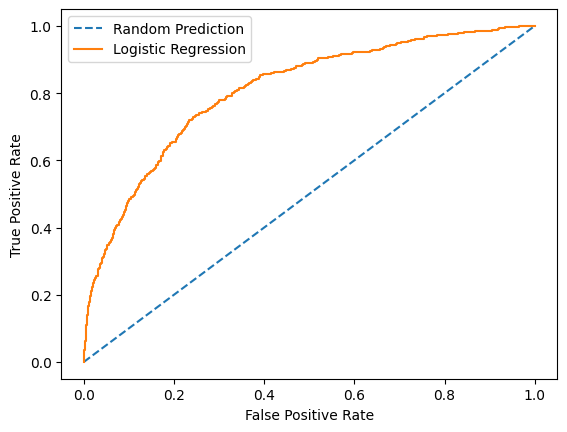

In [ ]:
# ROC and the AUC for test set

lr_prob_test_smote=LogReg.predict_proba(X_test)[:, 1]
ns_prob_test=[0 for _ in range(len(y_test))]
ns_auc_test=roc_auc_score(y_test, ns_prob_test)
lr_auc_test=roc_auc_score(y_test,lr_prob_test_smote)
print("AUC random predictions =", ns_auc_test)
print("AUC predictions from logistic regression model on training =", lr_auc)
print("AUC predictions from logistic regression model on validation =", lr_auc_val)
print("AUC predictions from logistic regression model on test =", lr_auc_test)
ns_fpr_test,ns_tpr_test,_=roc_curve(y_test,ns_prob_test)
lr_fpr_test,lr_tpr_test,threshold_test=roc_curve(y_test,lr_prob_test_smote)

plt.plot(ns_fpr_test,ns_tpr_test,linestyle='--',label='Random Prediction')
plt.plot(lr_fpr_test,lr_tpr_test,label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Performance evaluation of logit

In [ ]:
# Threshold values
threshold = [.1, .2, .5, .8, .9]

# Create a dataframe to store results
results = pd.DataFrame(columns=["Threshold", "Accuracy", "TP rate", "TN rate", "FP rate", "Precision", "f-score"])

# Fill in the Threshold column
results['Threshold'] = threshold

# Initialize index variable
j = 0

# Iterate over the thresholds
for i in threshold:

    # If probability for the test set > threshold, predict 1
    preds = np.where(LogReg.predict_proba(X_test)[:, 1] > i, 1, 0)

    # Create confusion matrix in percentage
    cm = (confusion_matrix(y_test, preds, labels=[1, 0], sample_weight=None) / len(y_test)) * 100

    # Display the confusion matrix for the current threshold
    print('Confusion matrix for threshold =', i)
    print(' ')

    TP = cm[0][0]  # True Positives
    FN = cm[0][1]  # False Positives
    FP = cm[1][0]  # True Negatives
    TN = cm[1][1]  # False Negatives

    ConMat = pd.DataFrame(
        [
            [cm[0][0], cm[0][1]],
            [cm[1][0], cm[1][1]]
        ], columns=['y_hat_1', 'y_hat_0']
    )
    ConMat.rename(index={0: 'y_1'}, inplace=True)
    ConMat.rename(index={1: 'y_0'}, inplace=True)

    print(ConMat)

    # Fill in the results dataframe
    results.iloc[j, 1] = accuracy_score(y_test, preds)
    results.iloc[j, 2] = recall_score(y_test, preds)
    results.iloc[j, 3] = TN / (FP + TN)  # True negative rate
    results.iloc[j, 4] = FP / (FP + TN)  # False positive rate
    results.iloc[j, 5] = precision_score(y_test, preds)
    results.iloc[j, 6] = f1_score(y_test, preds)

    j += 1

# Display all evaluation metrics
print('ALL METRICS')
print(results.T)

Confusion matrix for threshold = 0.1
 
       y_hat_1   y_hat_0
y_1   3.025330  0.000000
y_0  95.940064  1.034606
Confusion matrix for threshold = 0.2
 
       y_hat_1    y_hat_0
y_1   2.932572   0.092758
y_0  75.333571  21.641099
Confusion matrix for threshold = 0.5
 
       y_hat_1    y_hat_0
y_1   2.076347   0.948983
y_0  21.241527  75.733143
Confusion matrix for threshold = 0.8
 
      y_hat_1    y_hat_0
y_1  0.891902   2.133428
y_0  3.760257  93.214413
Confusion matrix for threshold = 0.9
 
      y_hat_1    y_hat_0
y_1  0.078487   2.946843
y_0  0.107028  96.867642
ALL METRICS
                  0         1         2         3         4
Threshold       0.1       0.2       0.5       0.8       0.9
Accuracy   0.040599  0.245737  0.778095  0.941063  0.969461
TP rate         1.0   0.96934  0.686321  0.294811  0.025943
TN rate    0.010669  0.223162  0.780958  0.961224  0.998896
FP rate    0.989331  0.776838  0.219042  0.038776  0.001104
Precision   0.03057  0.037469  0.089045  0.191718  0

Optimal threshold

The optimal threshold z is  0.5055079162509423
The TP rate according the optimal threshold z is  0.6977115263489397
The FP rate according the optimal threshold z is  0.21433970186857024


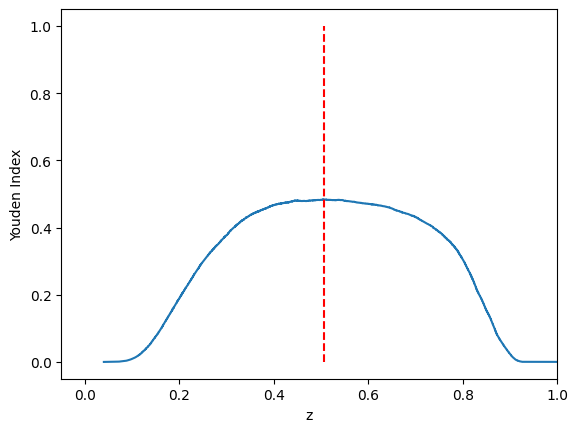

In [ ]:
J = lr_tpr-lr_fpr
J_z_opt = np.argmax(J, axis=0)
print("The optimal threshold z is ",threshold_train[J_z_opt])
print("The TP rate according the optimal threshold z is ",lr_tpr[J_z_opt])
print("The FP rate according the optimal threshold z is ",lr_fpr[J_z_opt])

plt.plot(threshold_train,J)
plt.vlines(threshold_train[J_z_opt],0,1,'red','dashed')
plt.xlabel("z")
plt.ylabel("Youden Index")
plt.xlim((-0.05,1))
plt.ylim((-0.05,1.05))
pd.DataFrame({"z":threshold_train,"j":J}).to_csv("Youden_stat.csv",index=False)

The optimal threshold z is  0.5055079162509423
The FPR rate according the optimal threshold z is  0.21433970186857024
The FNR rate according the optimal threshold z is  0.30228847365106026


(-0.05, 1.05)

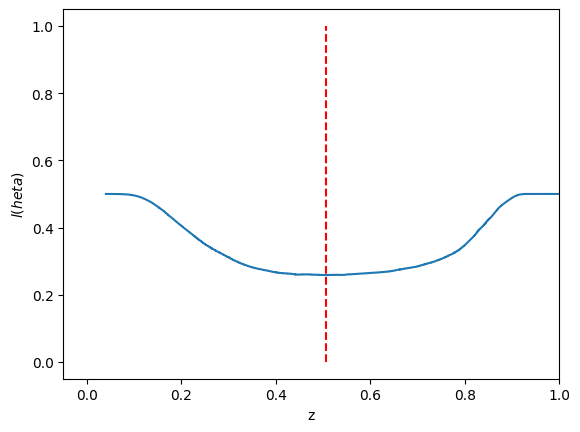

In [ ]:
theta = 0.5
l = theta*lr_fpr+ (1-theta)*(1-lr_tpr)
l_z_opt = np.argmax(-l, axis=0)
print("The optimal threshold z is ",threshold_train[l_z_opt])
print("The FPR rate according the optimal threshold z is ",lr_fpr[l_z_opt])
print("The FNR rate according the optimal threshold z is ",(1-lr_tpr[l_z_opt]))

plt.plot(threshold_train,l)
plt.vlines(threshold_train[l_z_opt],0,1,'red','dashed')
plt.xlabel("z")
plt.ylabel("$l(\theta)$")
plt.xlim((-0.05,1))
plt.ylim((-0.05,1.05))

### Two Class SVM + SMOTE

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.81      0.61      0.89      0.70      0.51      6805
          1       0.09      0.61      0.81      0.15      0.70      0.49       202

avg / total       0.96      0.80      0.62      0.87      0.70      0.50      7007

Specificity: 0.8072
Sensitivity: 0.6139
Accuracy: 0.8016
Precision: 0.0864
Recall: 0.6139
F1 Score: 0.1514
ROC AUC Score: 0.7105


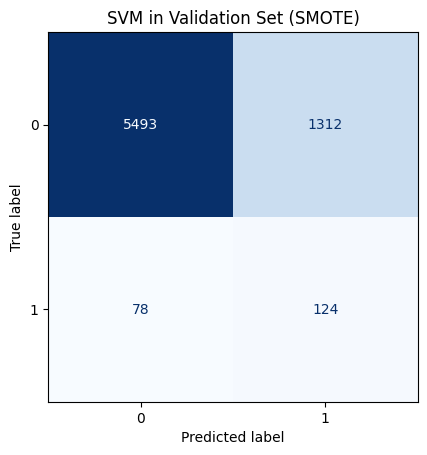

In [ ]:
from sklearn.svm import SVC
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize the SVM classifier with the RBF kernel and Pobs.
svm_rbf_prob = SVC(kernel='rbf', probability=True)

# Train on the SMOTE train data
svm_rbf_prob.fit(X_train_smote, y_train_smote)

# Prbabilities of val  and create  the Val CM
y_pred_val = svm_rbf_prob.predict(X_val)
cm= confusion_matrix(y_val, y_pred_val)

print(classification_report_imbalanced(y_val, y_pred_val))


# Visualize the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    svm_rbf_prob,
    X_val, y_val,
    colorbar=False,
    cmap='Blues'  # Change the color map here
)
_ = disp.ax_.set_title("SVM in Validation Set (SMOTE)")

# Calculate evaluation metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, zero_division=0)  # Handle zero division
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val, zero_division=0)  # Handle zero division
roc_auc = roc_auc_score(y_val, y_pred_val)

# Display all metrics for Validation
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

# Print the metrics
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")  # Print each metric to 4 decimal places



                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.80      0.67      0.88      0.73      0.54     13591
          1       0.09      0.67      0.80      0.16      0.73      0.53       424

avg / total       0.96      0.80      0.67      0.86      0.73      0.54     14015

Specificity: 0.8002
Sensitivity: 0.6651
Accuracy: 0.7961
Precision: 0.0941
Recall: 0.6651
F1 Score: 0.1649
ROC AUC Score: 0.7327


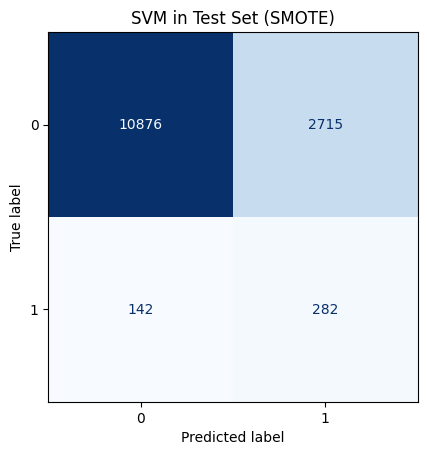

In [ ]:
from imblearn.metrics import classification_report_imbalanced

#Predict on test data and create Test CM
y_pred_test_sv1 = svm_rbf_prob.predict(X_test)
cm= confusion_matrix(y_test, y_pred_test_sv1)


print(classification_report_imbalanced(y_test, y_pred_test_sv1))

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    svm_rbf_prob,
    X_test, y_test,
    colorbar=False,
    cmap='Blues'  # Change the color map here
)
_ = disp.ax_.set_title("SVM in Test Set (SMOTE)")

# Calculate evaluation metrics
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_test_sv1)
precision = precision_score(y_test, y_pred_test_sv1, zero_division=0)  # Handle zero division
recall = recall_score(y_test,y_pred_test_sv1)
f1 = f1_score(y_test, y_pred_test_sv1, zero_division=0)  # Handle zero division
roc_auc = roc_auc_score(y_test, y_pred_test_sv1)

# Display all metrics for Validation
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

# Print the metrics
for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")  # Print each metric to 4 decimal places


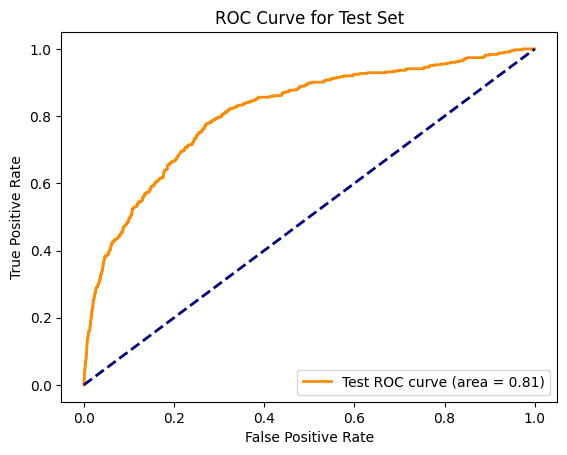

AUC Score for Test Set: 0.81


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_prob_test_sv1 = svm_rbf_prob.predict_proba(X_test)[:, 1]

#  ROC curve values for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_prob_test_sv1)
roc_auc_test = roc_auc_score(y_test, y_prob_test_sv1)

# Plot ROC curve for the test set
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc='lower right')
plt.show()

# Output the AUC score for the test set
print(f"AUC Score for Test Set: {roc_auc_test:.2f}")


### XGBoost + SMOTE

In [ ]:
#find the best combination of parameters
from xgboost import XGBClassifier
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import confusion_matrix

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Define parameter grid
param_grid = {
    'n_estimators': range(1,21),
    'max_depth': [2,3,4,5],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5]
}

# Initialize best score and best parameters
best_gm_score = 0
best_diff_score = float('inf')  # Initialize with positive infinity
best_params_smote = {}

# Iterate over parameter combinations
for n_estimators in param_grid['n_estimators']:
    for max_depth in param_grid['max_depth']:
        for learning_rate in param_grid['learning_rate']:
            # Instantiate XGBoost classifier with current parameters
            xgb_classifier = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, n_jobs=-1, random_state=42,objective='binary:logistic',eval_metric='auc')

            # Fit classifier
            xgb_classifier.fit(X_train_smote, y_train_smote)

            # Predict on validation set
            y_pred_val = xgb_classifier.predict(X_val)

            # Calculate confusion matrix
            cm = confusion_matrix(y_val, y_pred_val)
            tn, fp, fn, tp = cm.ravel()

            # Calculate specificity and sensitivity
            specificity = tn / (tn + fp)
            sensitivity = tp / (tp + fn)

            # Calculate geometric mean
            gm_score = np.sqrt(specificity * sensitivity)

            # Calculate difference between specificity and sensitivity
            diff_score = abs(specificity - sensitivity)

            # Update best parameters based on both conditions
            if gm_score > best_gm_score:
                best_gm_score = gm_score
                best_diff_score = diff_score
                best_params_smote = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

print("Best parameters:", best_params_smote)
print("Best geometric mean score:", best_gm_score)
print("Best difference between specificity and sensitivity:", best_diff_score)


Best parameters: {'n_estimators': 6, 'max_depth': 2, 'learning_rate': 0.4}
Best geometric mean score: 0.7433846536875175
Best difference between specificity and sensitivity: 0.04181258684281364


In [ ]:
# instantiate the classifier n_estimators=5, max_depth=2, n_jobs=-1, learning_rate=0.2, random_state=42
xgb_classifier_smote = XGBClassifier(n_estimators=best_params_smote['n_estimators'], max_depth=best_params_smote['max_depth'], n_jobs=-1, learning_rate=best_params_smote['learning_rate'], random_state=42,objective='binary:logistic',eval_metric='auc')


# fit the classifier to the training data
xgb_classifier_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=6, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

<Figure size 2e+06x1e+06 with 0 Axes>

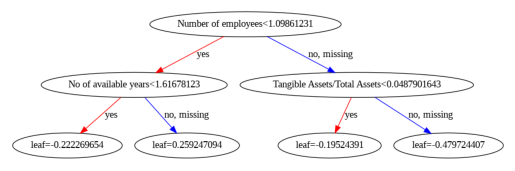

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Plot the final tree
plt.figure(figsize=(20000, 10000))  # Adjust figure size as needed
plot_tree(xgb_classifier_smote ,num_trees=1)
plt.show()

Specificity: 0.7604450976275456
Sensitivity: 0.8033802225488138
Accuracy: 0.7819126600881797
Precision: 0.7703069954705586
Recall: 0.8033802225488138
F1 Score: 0.7864960690611993
ROC AUC Score: 0.7819126600881797


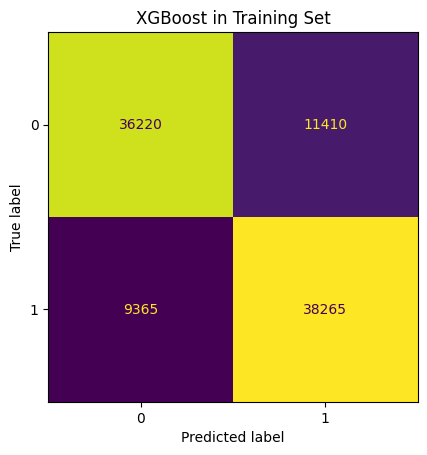

In [ ]:
#Confusion Matrix for training
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import classification_report_imbalanced

y_pred_train = xgb_classifier_smote.predict(X_train_smote)

#print(classification_report_imbalanced(y_train_smote, y_pred_val))

disp = ConfusionMatrixDisplay.from_estimator(xgb_classifier_smote,X_train_smote, y_train_smote, colorbar=False)
_ = disp.ax_.set_title("XGBoost in Training Set")

 # Calculate evaluation metrics
cm = confusion_matrix(y_train_smote, y_pred_train)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_train_smote, y_pred_train)
precision = precision_score(y_train_smote, y_pred_train)
recall = recall_score(y_train_smote, y_pred_train)
f1 = f1_score(y_train_smote, y_pred_train)
roc_auc = roc_auc_score(y_train_smote, y_pred_train)

# Display all metrics for Training
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

Specificity: 0.7645848640705364
Sensitivity: 0.7227722772277227
Accuracy: 0.763379477665192
Precision: 0.08352402745995423
Recall: 0.7227722772277227
F1 Score: 0.14974358974358973
ROC AUC Score: 0.7436785706491296


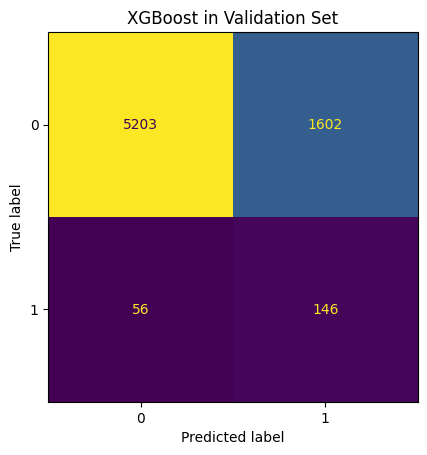

In [ ]:
#Confusion Matrix for validation

y_pred_val = xgb_classifier_smote.predict(X_val)

#print(classification_report_imbalanced(y_val, y_pred_val))

disp = ConfusionMatrixDisplay.from_estimator(xgb_classifier_smote,X_val, y_val, colorbar=False)
_ = disp.ax_.set_title("XGBoost in Validation Set")

 # Calculate evaluation metrics
cm = confusion_matrix(y_val, y_pred_val)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1 = f1_score(y_val, y_pred_val)
roc_auc = roc_auc_score(y_val, y_pred_val)

# Display all metrics for Validation
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

Specificity: 0.7663895224781105
Sensitivity: 0.7287735849056604
Accuracy: 0.7652515162326079
Precision: 0.08869115958668197
Recall: 0.7287735849056604
F1 Score: 0.15813715455475946
ROC AUC Score: 0.7475815536918855


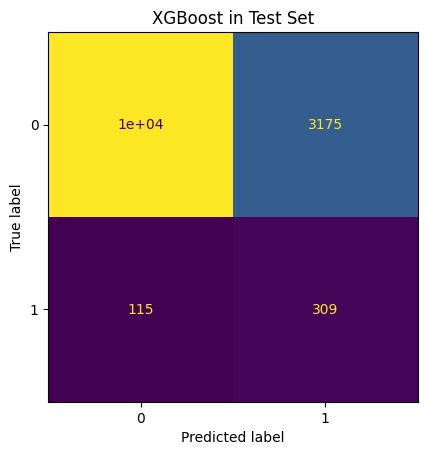

In [ ]:
#Confusion Matrix for test

y_pred_test_smote_xgb = xgb_classifier_smote.predict(X_test)

#print(classification_report_imbalanced(y_test, y_pred_test))

disp = ConfusionMatrixDisplay.from_estimator(xgb_classifier_smote,X_test, y_test, colorbar=False)
_ = disp.ax_.set_title("XGBoost in Test Set")

 # Calculate evaluation metrics
cm = confusion_matrix(y_test, y_pred_test_smote_xgb)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
accuracy = accuracy_score(y_test, y_pred_test_smote_xgb)
precision = precision_score(y_test, y_pred_test_smote_xgb)
recall = recall_score(y_test, y_pred_test_smote_xgb)
f1 = f1_score(y_test, y_pred_test_smote_xgb)
roc_auc = roc_auc_score(y_test, y_pred_test_smote_xgb)

# Display all metrics for Testing
metrics_dict = {
    "Specificity": specificity,
    "Sensitivity": sensitivity,
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "ROC AUC Score": roc_auc
}

for metric, values in metrics_dict.items():
    print(f"{metric}: {np.mean(values)}")

ROC curve score is 0.81


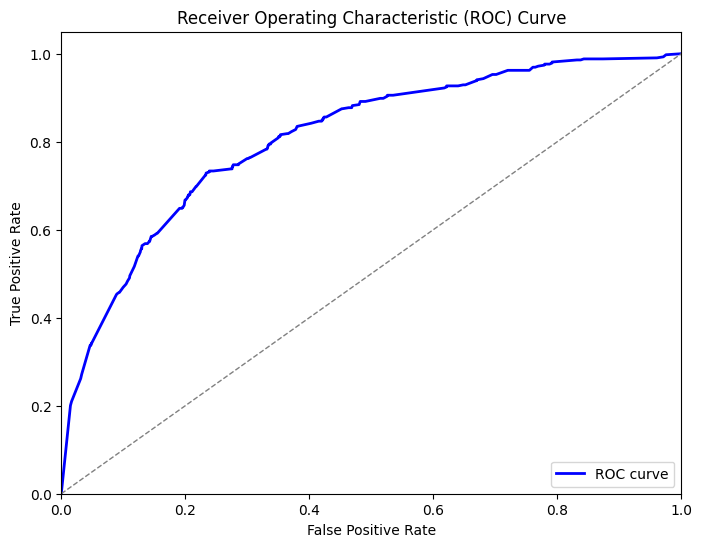

In [ ]:
#ROC Curve
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#XGBoost

#Predict probabilities
y_pred_test_xgb_prob = xgb_classifier_smote.predict_proba(X_test)[:, 1]

#Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_xgb_prob)
print(f"ROC curve score is {roc_auc_score(y_test, y_pred_test_xgb_prob):.2f}")

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

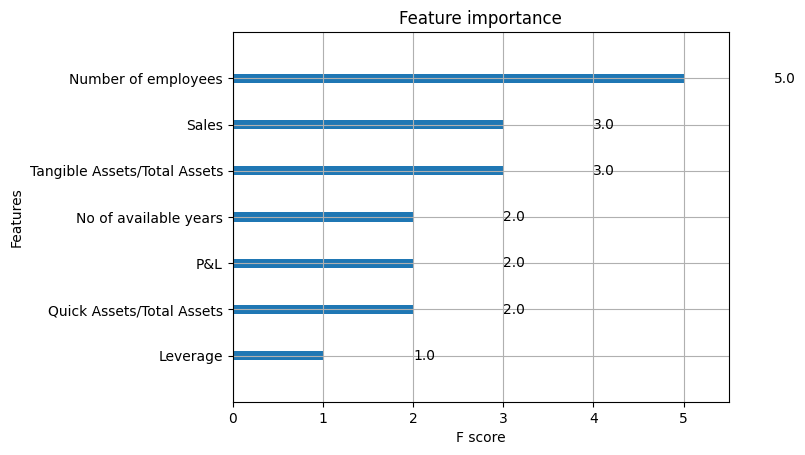

In [ ]:
# plot feature importance
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb_classifier_smote)
pyplot.show()

# Perfomance Comparison

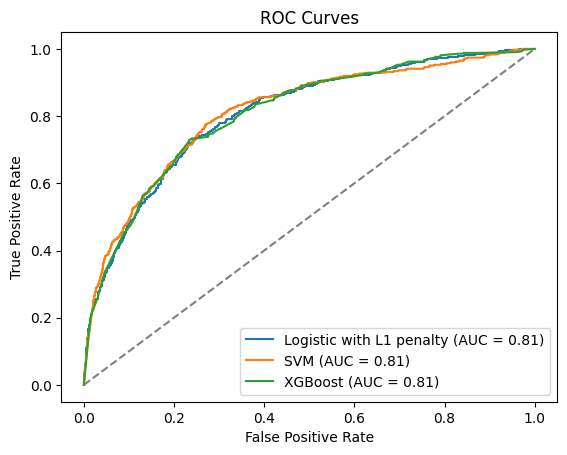

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, model_label=None):
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_label} (AUC = {roc_auc:.2f})')

# Your true class labels and predicted probabilities
y_true = y_test
predictions1 = lr_prob_test_smote
predictions2 = y_prob_test_sv1
predictions3 = y_pred_test_xgb_prob

# Calculate ROC curve points for all three models
fpr1, tpr1, _ = roc_curve(y_true, predictions1)
fpr2, tpr2, _ = roc_curve(y_true, predictions2)
fpr3, tpr3, _ = roc_curve(y_true, predictions3)

# Plot ROC curves
plt.figure()

# Plot the "Random Guessing" line
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')

# Plot each model's ROC curve
plot_roc_curve(fpr1, tpr1, 'Logistic with L1 penalty')
plot_roc_curve(fpr2, tpr2, 'SVM')
plot_roc_curve(fpr3, tpr3, 'XGBoost')

plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Geometric Mean
from imblearn.metrics import geometric_mean_score

#Logistic Regression
print(f"The geometric mean of Logistic Regression is {geometric_mean_score(y_test, y_pred_test_smote_lr):.3f}")

#Two Class SVM
print(f"The geometric mean of Two Class SVM is {geometric_mean_score(y_test, y_pred_test_sv1):.3f}")

#XGBoost/AdaBoost
print(f"The geometric mean of XGBoost is {geometric_mean_score(y_test, y_pred_test_smote_xgb):.3f}")

The geometric mean of Logistic Regression is 0.732
The geometric mean of Two Class SVM is 0.730
The geometric mean of XGBoost is 0.747
